# BIKE SHARING DEMAND PROJECT

### DEFINING STEPS OF PROJECT


- Design a specific question or data and get the source to determine the required data.

- Make sure the data is in an accessible format else convert it to the required format.

- Specify all noticeable anomalies and missing data points that may be required to achieve the required data.

- Create models with different type of machine learning models that are suitable for your aim 

-For every model type:

- Set the baseline model that you want to achieve

- Train the data machine learning model.

- Provide an insight into the model with test data

- Now compare the performance metrics of both the test data and the predicted data from the model.

- If it doesn’t satisfy your expectations, you can try improving your model accordingly or dating your data, you can do hyperparameter tuning and get best parameter. With the best parameter you can set a new model that has best score.

- You can move on with another type of model.



In [ ]:
#### INSTALL REQUİRED PACKAGES

In [ ]:
#conda install -c conda-forge py-xgboost

In [162]:
#!pip install graphviz

In [161]:
#!pip install missingno 

### IMPPORT REQUIRED PACKAGES

In [3]:
# Model Packages
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_log_error
# Standard Packages
import shap
import pandas as pd
import missingno as mnso
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns
import warnings
import re
import optuna
from math import sqrt
# Warning
warnings.filterwarnings('ignore')

# To export graphs
%matplotlib inline
[131]


[131]

In [4]:
train = pd.read_csv("hour.csv")

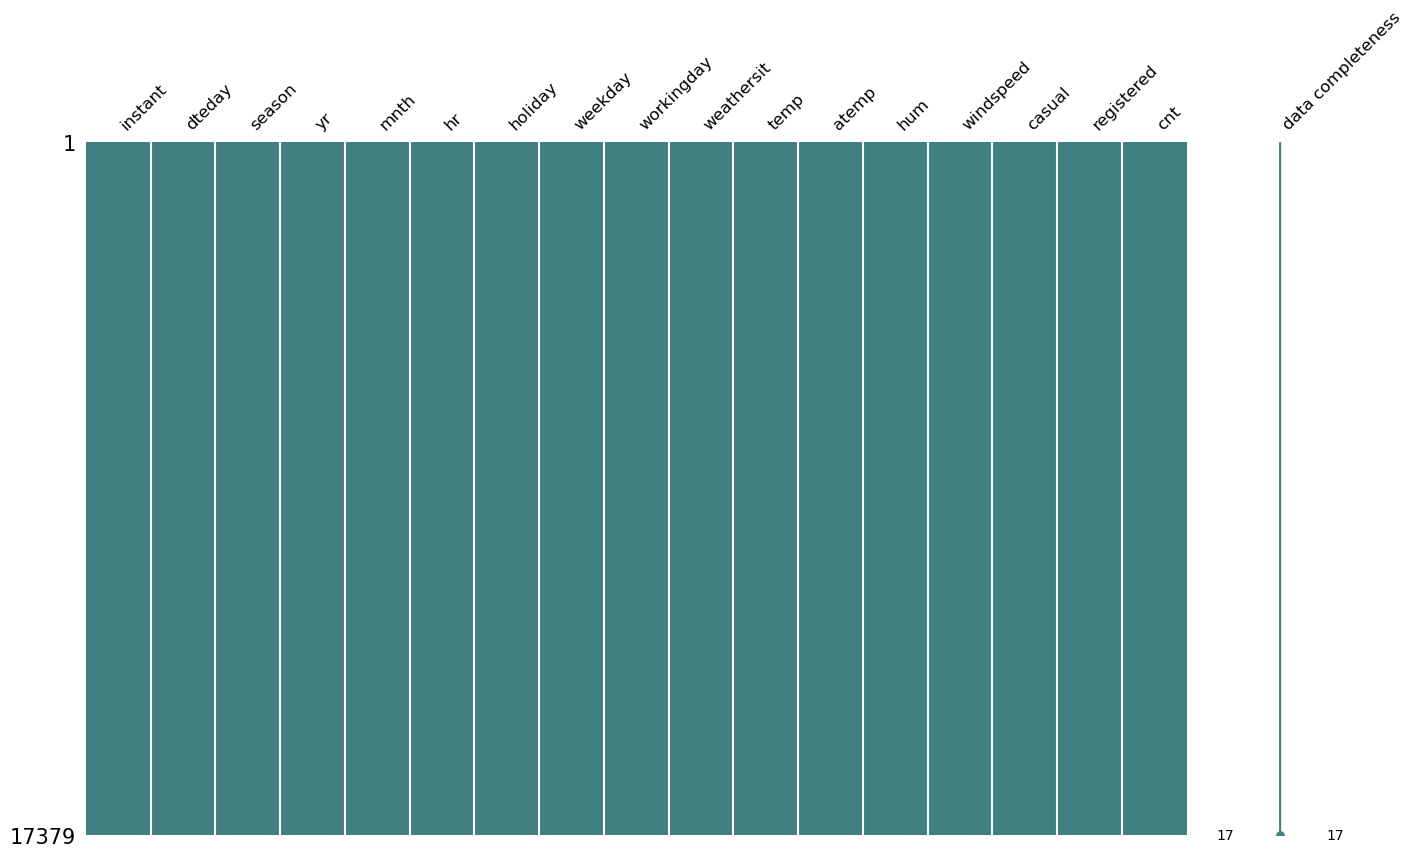

In [5]:
mnso.matrix(train,labels=17,figsize=(16,9),fontsize=12,width_ratios=(12,1), color=(0.25,0.5,0.5));plt.show()

In [6]:
train.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

In [7]:
train.describe().T

count         mean          std   min        25%        50%  \
instant     17379.0  8690.000000  5017.029500  1.00  4345.5000  8690.0000   
season      17379.0     2.501640     1.106918  1.00     2.0000     3.0000   
yr          17379.0     0.502561     0.500008  0.00     0.0000     1.0000   
mnth        17379.0     6.537775     3.438776  1.00     4.0000     7.0000   
hr          17379.0    11.546752     6.914405  0.00     6.0000    12.0000   
holiday     17379.0     0.028770     0.167165  0.00     0.0000     0.0000   
weekday     17379.0     3.003683     2.005771  0.00     1.0000     3.0000   
workingday  17379.0     0.682721     0.465431  0.00     0.0000     1.0000   
weathersit  17379.0     1.425283     0.639357  1.00     1.0000     1.0000   
temp        17379.0     0.496987     0.192556  0.02     0.3400     0.5000   
atemp       17379.0     0.475775     0.171850  0.00     0.3333     0.4848   
hum         17379.0     0.627229     0.192930  0.00     0.4800     0.6300   
windspeed   17379.0     0.190098     0.122340  0.00     0.1045     0.1940   
casual      17379.0    35.676218    49.305030  0.00     4.0000    17.0000   
registered  17379.0   153.786869   151.357286  0.00    34.0000   115.0000   
cnt         17379.0   189.463088   181.387599  1.00    40.0000   142.0000   

                   75%         max  
instant     13034.5000  17379.0000  
season          3.0000      4.0000  
yr              1.0000      1.0000  
mnth           10.0000     12.0000  
hr             18.0000     23.0000  
holiday         0.0000      1.0000  
weekday         5.0000      6.0000  
workingday      1.0000      1.0000  
weathersit      2.0000      4.0000  
temp            0.6600      1.0000  
atemp           0.6212      1.0000  
hum             0.7800      1.0000  
windspeed       0.2537      0.8507  
casual         48.0000    367.0000  
registered    220.0000    886.0000  
cnt           281.0000    977.0000

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
train["dteday"] = pd.to_datetime(train["dteday"])

In [10]:
def get_uniques(data):
    for cols in data.columns:
        unique_total = data[cols].nunique()
        if unique_total <= 10:
            print("Number of unique values in", cols, ":", unique_total)

In [11]:
get_uniques(train)

Number of unique values in season : 4
Number of unique values in yr : 2
Number of unique values in holiday : 2
Number of unique values in weekday : 7
Number of unique values in workingday : 2
Number of unique values in weathersit : 4


## EXPLONATORY DATA ANALYSIS

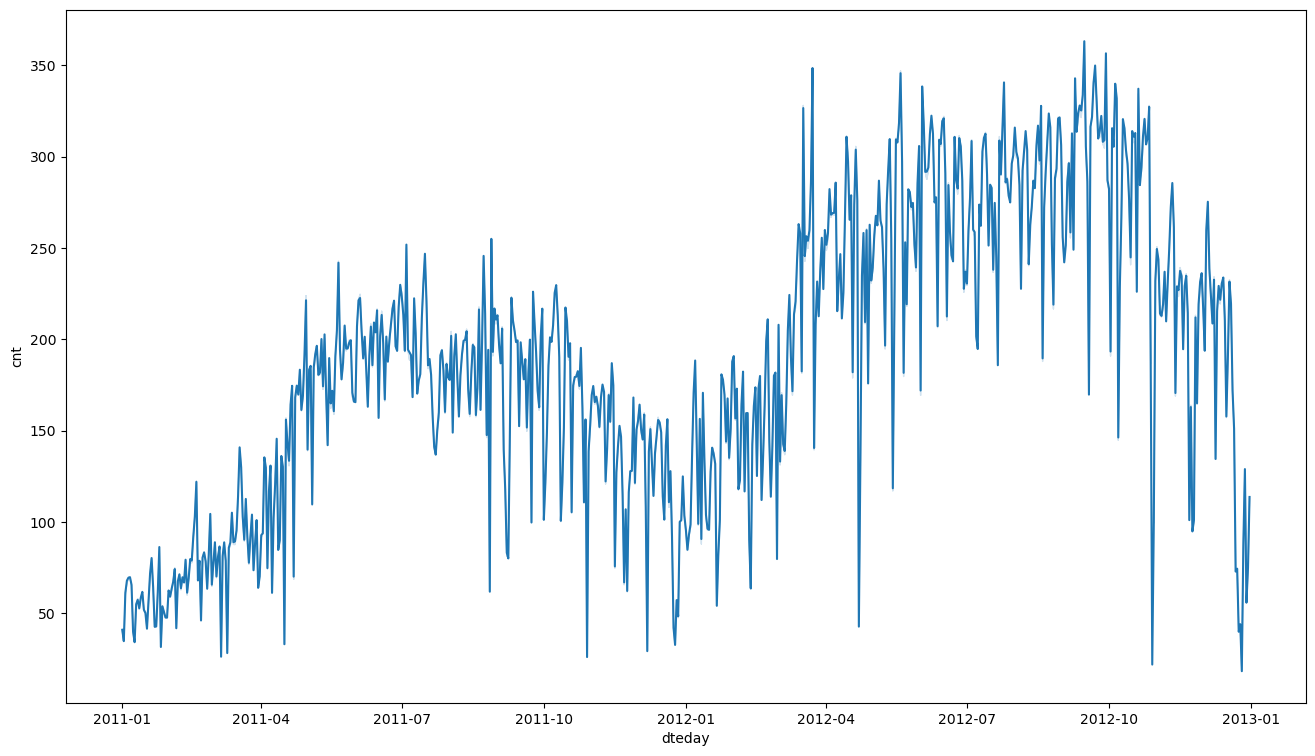

In [12]:
fig=plt.subplots(figsize=(16,9))
sns.lineplot(data=train, x="dteday",y="cnt", ci=False);plt.show()

<AxesSubplot:xlabel='season', ylabel='cnt'>

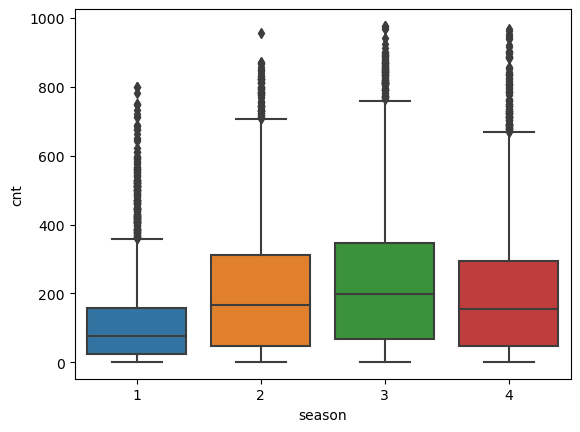

In [13]:
sns.boxplot(data=train, x="season", y="cnt")

<AxesSubplot:xlabel='season', ylabel='cnt'>

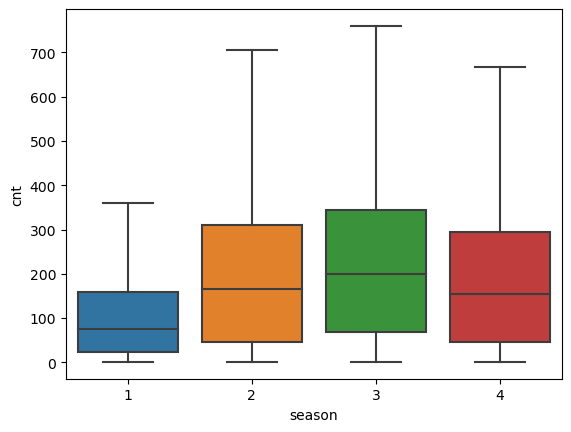

In [14]:
sns.boxplot(data=train, x="season", y="cnt",showfliers = False)

<AxesSubplot:xlabel='yr', ylabel='cnt'>

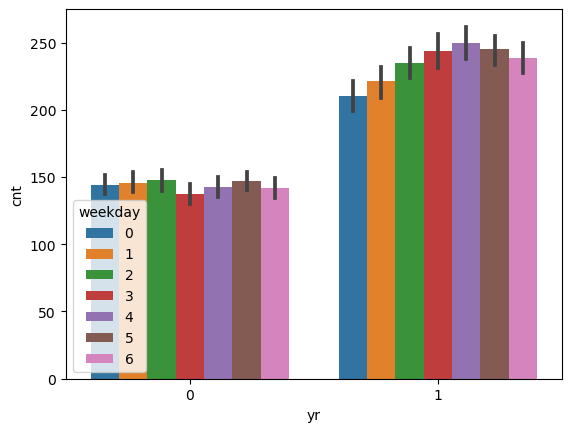

In [15]:
sns.barplot(data=train, x="yr",y="cnt",hue="weekday")

<AxesSubplot:xlabel='dteday', ylabel='cnt'>

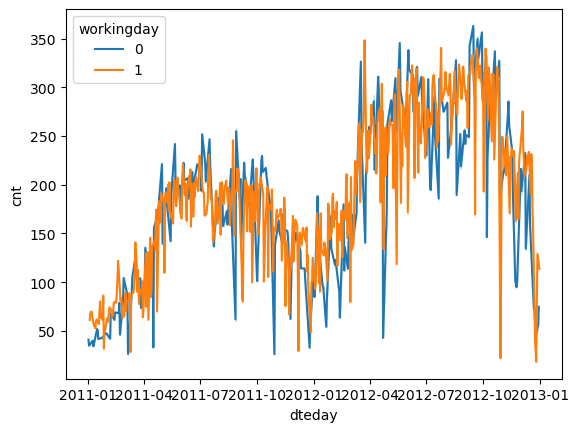

In [16]:
sns.lineplot(data=train,x="dteday",y="cnt",hue="workingday",ci=False)

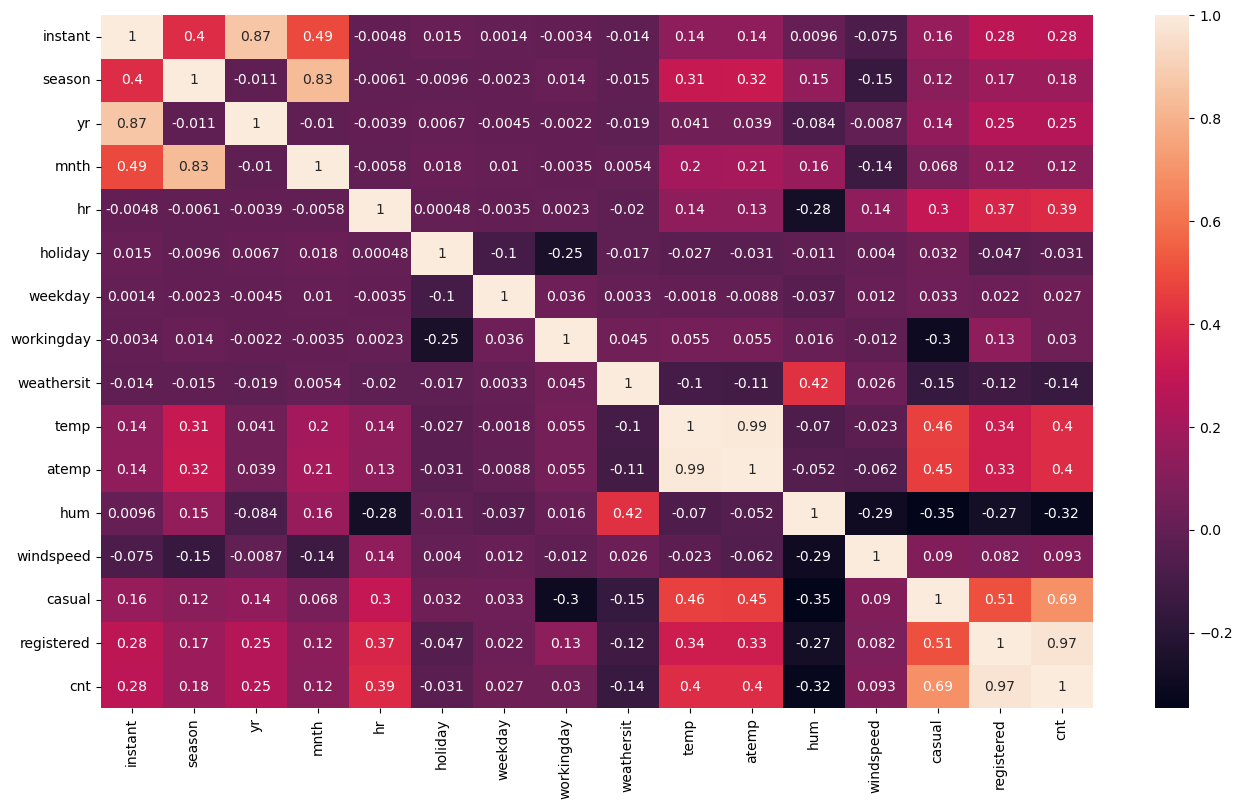

In [17]:
fig=plt.subplots(figsize=(16,9))
sns.heatmap(data=train.corr(),annot=True);plt.show()

In [18]:
df = train.rename(columns={'weathersit':'weather',
                       'yr':'year',
                       'mnth':'month',
                       'hr':'hour',
                       'hum':'humidity',
                       'cnt':'count'})
df.head()

instant     dteday  season  year  month  hour  holiday  weekday  \
0        1 2011-01-01       1     0      1     0        0        6   
1        2 2011-01-01       1     0      1     1        0        6   
2        3 2011-01-01       1     0      1     2        0        6   
3        4 2011-01-01       1     0      1     3        0        6   
4        5 2011-01-01       1     0      1     4        0        6   

   workingday  weather  temp   atemp  humidity  windspeed  casual  registered  \
0           0        1  0.24  0.2879      0.81        0.0       3          13   
1           0        1  0.22  0.2727      0.80        0.0       8          32   
2           0        1  0.22  0.2727      0.80        0.0       5          27   
3           0        1  0.24  0.2879      0.75        0.0       3          10   
4           0        1  0.24  0.2879      0.75        0.0       0           1   

   count  
0     16  
1     40  
2     32  
3     13  
4      1

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   year        17379 non-null  int64         
 4   month       17379 non-null  int64         
 5   hour        17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weather     17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  humidity    17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  count       17379 non-

In [20]:
# Transform object features to categorıcal
cols = ['season','month','hour','holiday','weekday','workingday','weather']
for col in cols:
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   year        17379 non-null  int64         
 4   month       17379 non-null  category      
 5   hour        17379 non-null  category      
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weather     17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  humidity    17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  count       17379 non-

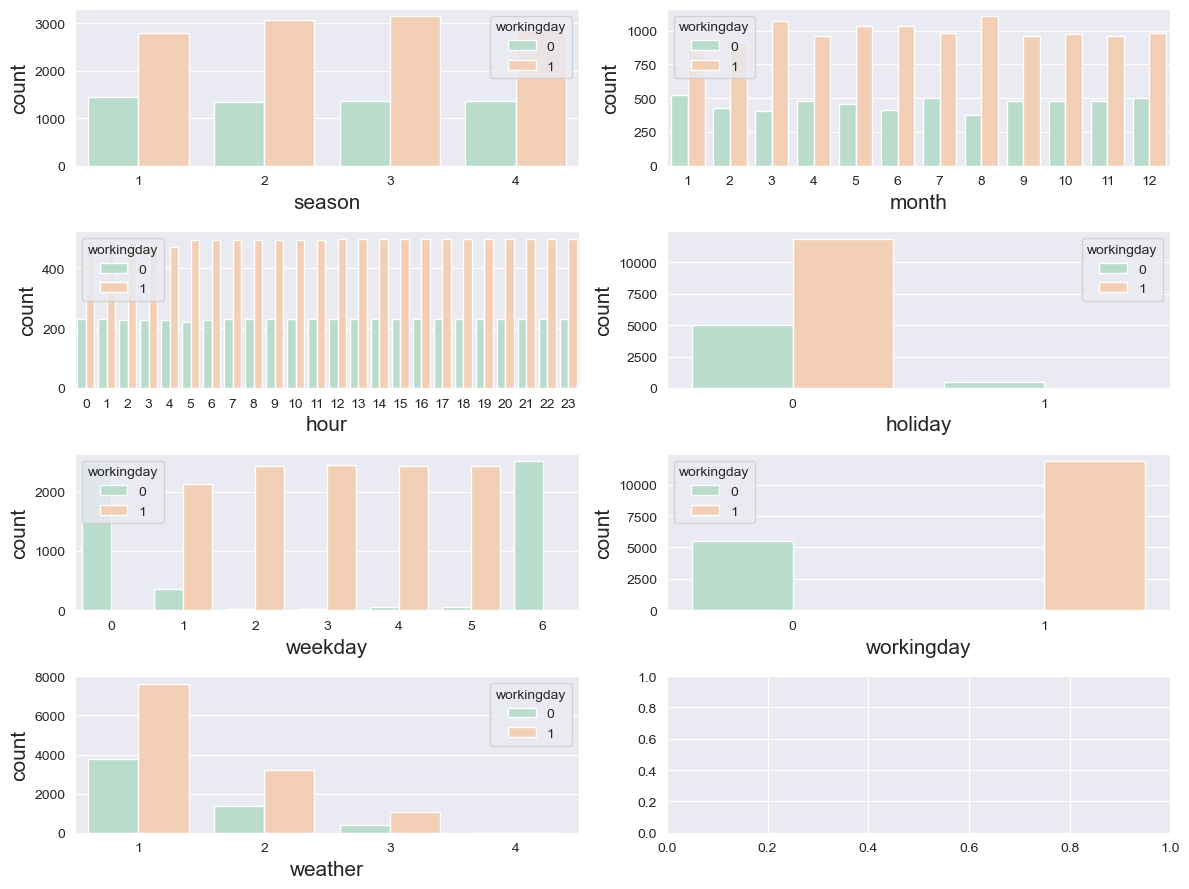

In [21]:
sns.set_style('darkgrid')
colors = ['#0055ff', '#ff7000', '#23bf00']
CustomPalette = sns.set_palette(sns.color_palette(colors))
OrderedCols = df.select_dtypes(include='category')
fig, ax = plt.subplots(4, 2, figsize=(12,9),dpi=100)

for i,col in enumerate(OrderedCols):
    x = i//2
    y = i%2
    sns.countplot(data=df, x=col, hue= 'workingday',ax=ax[x,y],palette='Pastel2')
    ax[x,y].xaxis.label.set_size(15)
    ax[x,y].yaxis.label.set_size(15)


plt.tight_layout()    
plt.show()

In [22]:
numeric_list = []
numerics=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
Num= df.select_dtypes(include=numerics)
for i in Num:
    numeric_list.append(i)
print(numeric_list)

['instant', 'year', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']


In [23]:
def UVA_numeric(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True, color="orange") 


    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))


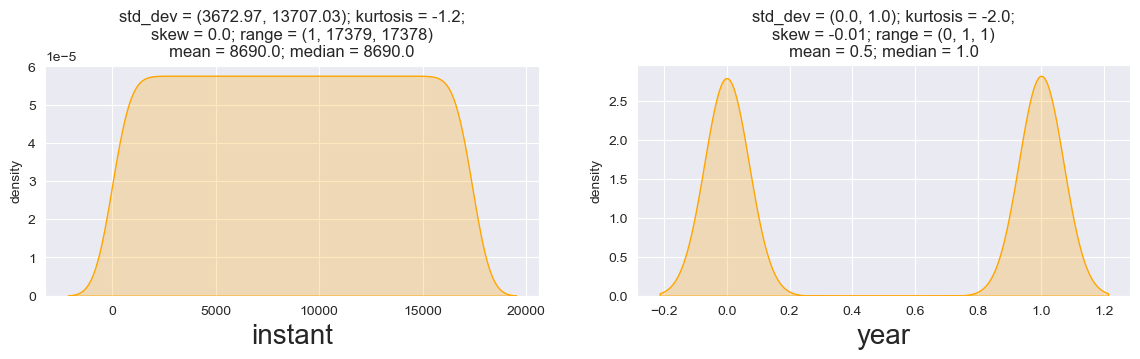

In [24]:
UVA_numeric(df, numeric_list[0:2])

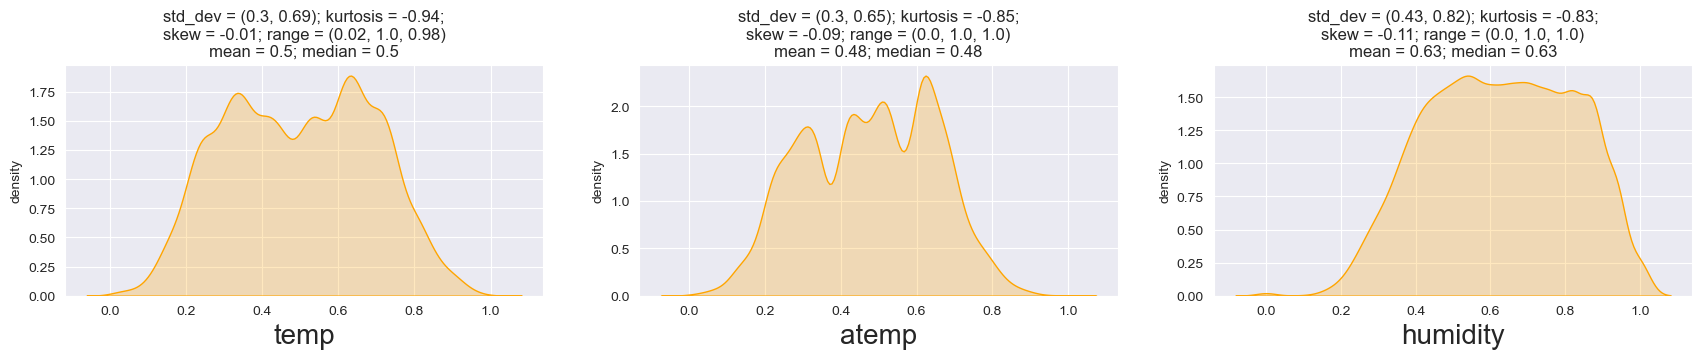

In [25]:
UVA_numeric(df, numeric_list[2:5])

## FEATURE SCALING
As We checked before there is no null value. Because of using Tree based regression model we do not need scaling data. Besides we will not make onehot encoding because whe we tried making one hot encoding, the result of all regression model that we used gave worse results compared to data without onehot encoding


Data just need to delete unnnecessary columns and splitting into train and test set.

In [26]:
# DELETE UNNECESSARY COLUMNS
df = df.drop(columns=['instant', 'dteday', 'year'])

In [27]:
df= df.drop(columns=['registered', 'casual'])

In [28]:
X=df.drop('count',axis=1)
y=df['count']

In [29]:
# SPLIT DATA INTO TRAIN AND TEST
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, shuffle=True, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12165, 11), (5214, 11), (12165,), (5214,))

## MODELLING 

#### IMPORT NECASSARY PACKAGES
Because of using XGBoostRegressor, I installed it at the beginning of this notebook.Besides I use Gradientboosting and DecisionTree Regrossor 

### REGRESSION WITH DECISIONTREE REGRESSOR

Like SVMs, Decision Trees are versatile Machine Learning algorithms that can perform both classification and regression tasks, and even multi-output tasks. They are very powerful algorithms, capable of fitting complex datasets. Decision Trees split the instances into two or more homogeneous sets based on most significant splitter / differentiator in input variables.

Decision Trees are also the fundamental components of Random Forests, which are among the most powerful Machine Learning algorithms available today.

- Advantages 

 Easy to Understand: Decision tree output is very easy to understand even for people from non-analytical background. It does not require any statistical knowledge to read and interpret them. Its graphical representation is very intuitive and users can easily relate their hypothesis.

 Useful in Data exploration: Decision tree is one of the fastest way to identify most significant variables and relation between two or more variables. With the help of decision trees, we can create new variables / features that has better power to predict target variable. You can refer article (Trick to enhance power of regression model) for one such trick. It can also be used in data exploration stage. For example, we are working on a problem where we have information available in hundreds of variables, there decision tree will help to identify most significant variable.

 Less data cleaning required: It requires less data cleaning compared to some other modeling techniques. It is not influenced by outliers and missing values to a fair degree.
Data type is not a constraint: It can handle both numerical and categorical variables.
Non Parametric Model: Decision trees are considered to be a non-parametric models, not because they do not have any parameters (they often have a lot) but because the number of parameters are not determined prior to training, so the model structure is free to stick closely to the data. In contrast, a parametric model such as a linear model has a predetermined number of parameters, so its degree of freedom is limited, reducing the risk of overfitting (but increasing the risk of underfitting).

- Disadvantages 

 Over fitting: Over fitting is one of the most practical difficulty for decision tree models. This problem gets solved by setting constraints on model parameters and pruning.
Not fit for continuous variables: While working with continuous numerical variables, decision tree looses information when it categorizes variables in different categories.

In [27]:
model = DecisionTreeRegressor(max_depth=3,random_state=42)

In [28]:
model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [29]:
#!pip3 install six

In [30]:
#conda install pydotplus

In [31]:
#conda install graphviz

#### BUILD TREES 

To see how the tree has grown to predict the final outcomes. For this, we need to install and import pydotplus and graphviz python libraries.

In [32]:
from graphviz import Source
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from IPython.display import display
from IPython.display import Image  
from six import StringIO
import pydotplus, graphviz



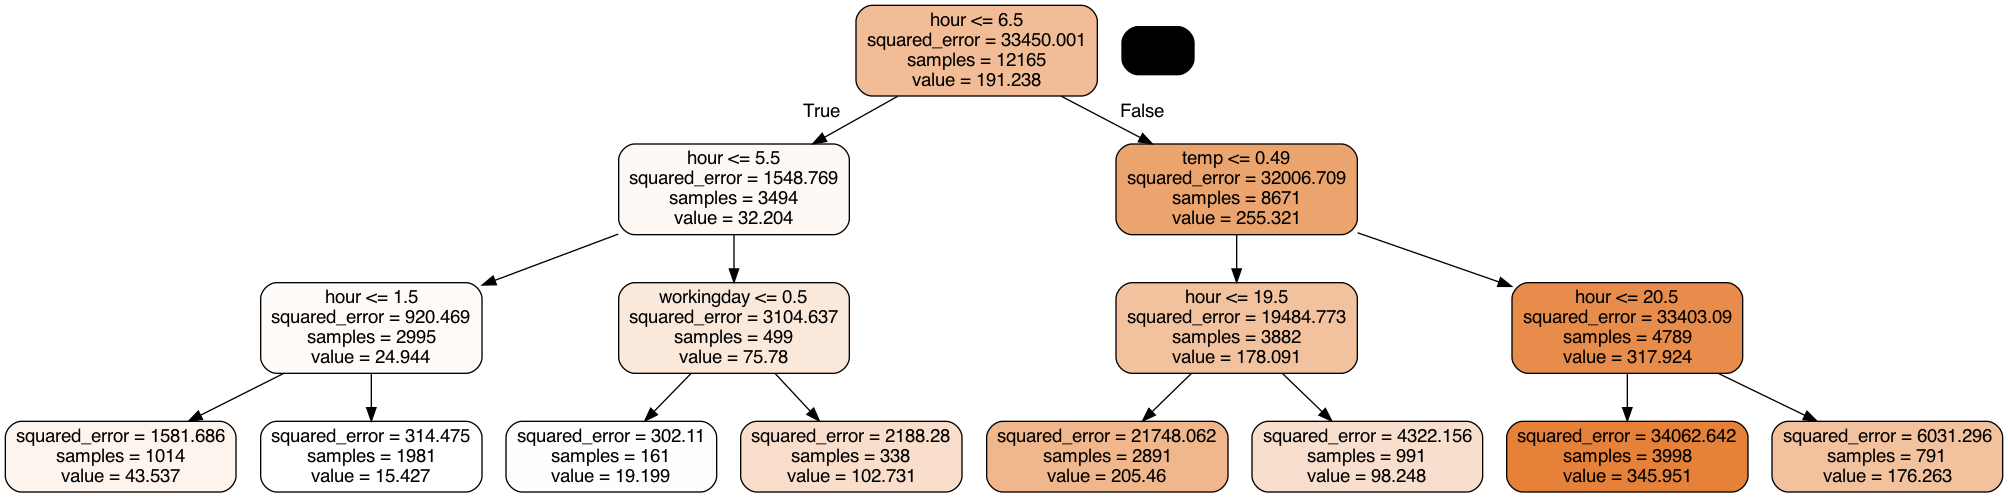

In [33]:
dot_data = StringIO()  

tree.export_graphviz(model, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                )

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png(),width = 9000, height = 10000)

In [34]:
# SAVING GRAPH AS PDF
graph.write_pdf("bike-sharing-trees.pdf")

True

NOTE= As we see the result of trees. most important feature is atemp that is feeling temperature. Second important parameter is hour 8 and 17. 

In [35]:
model_tree=DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10,random_state=42)

In [36]:
model_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, max_leaf_nodes=10, min_samples_split=5,
                      random_state=42)

In [37]:
y_pred = model_tree.predict(X_test) 
print("Score:",model_tree.score(X_test,y_test))
print("RMSE:", sqrt(mean_squared_error(y_test, y_pred)))

Score: 0.5499861855119522
RMSE: 119.2321884221146


In [38]:
param_grid = {"criterion": ["squared_error"],
              "min_samples_split": [3,5,10, 20, 40],
              "max_depth": [10,20,30,50,70,100],
              "min_samples_leaf": [5,10,20,50,100,300],
              "max_leaf_nodes": [50,100,150,200,300,500,700]}

## Comment in order to publish in kaggle.

grid_cv_tree = GridSearchCV(model_tree, param_grid, cv=5, n_jobs=-1)

grid_cv_tree.fit(X_train,y_train)


GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(max_depth=4, max_leaf_nodes=10,
                                             min_samples_split=5,
                                             random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['squared_error'],
                         'max_depth': [10, 20, 30, 50, 70, 100],
                         'max_leaf_nodes': [50, 100, 150, 200, 300, 500, 700],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 300],
                         'min_samples_split': [3, 5, 10, 20, 40]})

In [39]:
grid_cv_tree.best_params_

{'criterion': 'squared_error',
 'max_depth': 30,
 'max_leaf_nodes': 500,
 'min_samples_leaf': 5,
 'min_samples_split': 40}

In [40]:
grid_cv_tree.best_score_

0.8121436353168574

#### Build Tree Regression with Best Params

In [41]:
tree=DecisionTreeRegressor(**grid_cv_tree.best_params_)

In [42]:
tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=30, max_leaf_nodes=500, min_samples_leaf=5,
                      min_samples_split=40)

In [43]:
y_pred = tree.predict(X_test) 
print("Score:",grid_cv_tree.score(X_test,y_test))
print("RMSE:", sqrt(mean_squared_error(y_test, y_pred)))

Score: 0.8161039455427439
RMSE: 76.21699907950214


### REGRESSION MODEL  WITH MLP REGRESSOR 

A multilayer perceptron is a class of feedforward artificial neural network. The term MLP is used ambiguously, sometimes loosely to any feedforward ANN, sometimes strictly to refer to networks composed of multiple layers of perceptrons.

The disadvantages of Multi-layer Perceptron (MLP) include:

MLP with hidden layers have a non-convex loss function where there exists more than one local minimum. Therefore different random weight initializations can lead to different validation accuracy.

MLP requires tuning a number of hyperparameters such as the number of hidden neurons, layers, and iterations.

MLP is sensitive to feature scaling.

In [32]:
from sklearn.neural_network import MLPRegressor

In [45]:
regr = MLPRegressor(random_state=42, max_iter=300,hidden_layer_sizes=(200,200,200),learning_rate='adaptive',
                   )

regr.fit(X_train, y_train)
y_pred= regr.predict(X_test)
rmse= MSE(y_test,y_pred)**(1/2)
print("MLP RMSE: {:.3f}".format(rmse),"\n","\nr^2: {:3f}".format(regr.score(X_test,y_test)))

MLP RMSE: 69.274 
 
r^2: 0.848092


In [33]:
# Build model with parameters for Optuna
def objective(trial):

    param = {
        'batch_size': trial.suggest_categorical('batch_size', [16, 32, 64]),
        'hidden_layer_sizes': trial.suggest_categorical('hidden_layer_sizes', [ 64,128,256]),
        'activation': trial.suggest_categorical('activation', [ 'tanh', 'relu']),
        'max_iter': trial.suggest_categorical('max_iter', [200,300,500]),
        'learning_rate': trial.suggest_categorical('learning_rate', ['constant', 'adaptive']), 
        'random_state': trial.suggest_categorical('random_state', [2023]),
    }
    mlp =MLPRegressor(**param)  
    
    mlp.fit(X_train,y_train)
    
    preds = mlp.predict(X_test)
    
    rmse = sqrt(mean_squared_error(y_test, preds))

    return rmse

In [34]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2023-04-17 10:41:03,531] A new study created in memory with name: no-name-ba7b4845-3295-485a-9935-ded8b452c5ce
[I 2023-04-17 10:41:15,337] Trial 0 finished with value: 106.0643815961242 and parameters: {'batch_size': 64, 'hidden_layer_sizes': 128, 'activation': 'relu', 'max_iter': 300, 'learning_rate': 'constant', 'random_state': 2023}. Best is trial 0 with value: 106.0643815961242.
[I 2023-04-17 10:41:31,607] Trial 1 finished with value: 101.56764268826099 and parameters: {'batch_size': 32, 'hidden_layer_sizes': 256, 'activation': 'relu', 'max_iter': 200, 'learning_rate': 'constant', 'random_state': 2023}. Best is trial 1 with value: 101.56764268826099.
[I 2023-04-17 10:42:04,343] Trial 2 finished with value: 80.8081982917948 and parameters: {'batch_size': 16, 'hidden_layer_sizes': 64, 'activation': 'tanh', 'max_iter': 300, 'learning_rate': 'constant', 'random_state': 2023}. Best is trial 2 with value: 80.8081982917948.
[I 2023-04-17 10:42:51,533] Trial 3 finished with value: 72.95

Number of finished trials: 10
Best trial: {'batch_size': 64, 'hidden_layer_sizes': 256, 'activation': 'tanh', 'max_iter': 500, 'learning_rate': 'constant', 'random_state': 2023}


In [35]:
study.trials_dataframe()

number       value             datetime_start          datetime_complete  \
0       0  106.064382 2023-04-17 10:41:03.533887 2023-04-17 10:41:15.337753   
1       1  101.567643 2023-04-17 10:41:15.338526 2023-04-17 10:41:31.607056   
2       2   80.808198 2023-04-17 10:41:31.607857 2023-04-17 10:42:04.343121   
3       3   72.956726 2023-04-17 10:42:04.343874 2023-04-17 10:42:51.532793   
4       4   86.959277 2023-04-17 10:42:51.533582 2023-04-17 10:43:32.597521   
5       5  111.024533 2023-04-17 10:43:32.598300 2023-04-17 10:43:40.447463   
6       6   95.088883 2023-04-17 10:43:40.448221 2023-04-17 10:44:33.262472   
7       7   73.432529 2023-04-17 10:44:33.263224 2023-04-17 10:45:27.672227   
8       8   93.678641 2023-04-17 10:45:27.672987 2023-04-17 10:45:54.927889   
9       9  106.385852 2023-04-17 10:45:54.928671 2023-04-17 10:46:07.812372   

                duration params_activation  params_batch_size  \
0 0 days 00:00:11.803866              relu                 64   
1 0 days 00:00:16.268530              relu                 32   
2 0 days 00:00:32.735264              tanh                 16   
3 0 days 00:00:47.188919              tanh                 64   
4 0 days 00:00:41.063939              relu                 16   
5 0 days 00:00:07.849163              relu                 64   
6 0 days 00:00:52.814251              relu                 16   
7 0 days 00:00:54.409003              tanh                 16   
8 0 days 00:00:27.254902              relu                 16   
9 0 days 00:00:12.883701              relu                 64   

   params_hidden_layer_sizes params_learning_rate  params_max_iter  \
0                        128             constant              300   
1                        256             constant              200   
2                         64             constant              300   
3                        256             constant              500   
4                        256             adaptive              300   
5                        128             adaptive              200   
6                         64             adaptive              500   
7                         64             adaptive              500   
8                        256             constant              200   
9                        256             constant              200   

   params_random_state     state  
0                 2023  COMPLETE  
1                 2023  COMPLETE  
2                 2023  COMPLETE  
3                 2023  COMPLETE  
4                 2023  COMPLETE  
5                 2023  COMPLETE  
6                 2023  COMPLETE  
7                 2023  COMPLETE  
8                 2023  COMPLETE  
9                 2023  COMPLETE

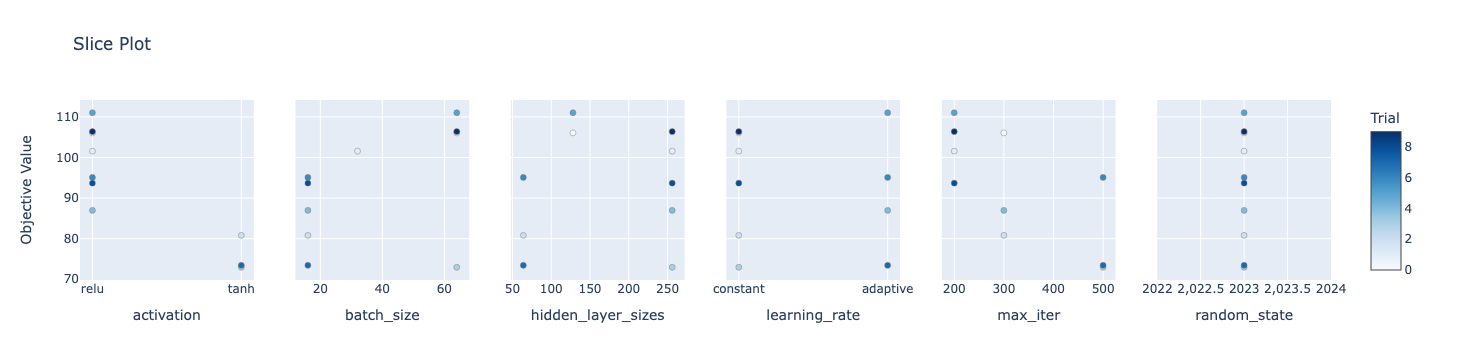

In [43]:
optuna.visualization.plot_slice(study)

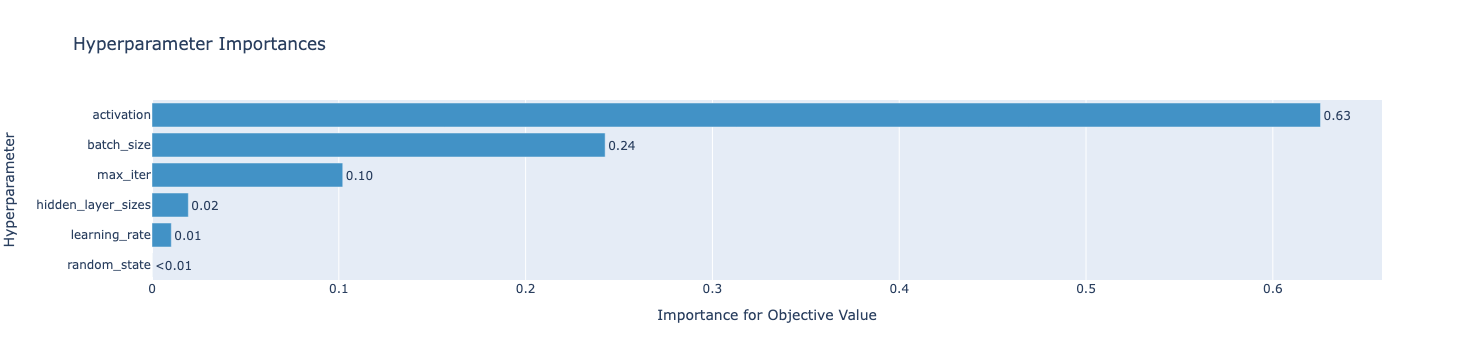

In [44]:
optuna.visualization.plot_param_importances(study)

#### Build Best MLPRegressor Model

In [45]:
Best_trial = study.best_trial.params
Best_trial

{'batch_size': 64,
 'hidden_layer_sizes': 256,
 'activation': 'tanh',
 'max_iter': 500,
 'learning_rate': 'constant',
 'random_state': 2023}

In [46]:
bestmlp=MLPRegressor(**Best_trial)

In [49]:
bestmlp.fit(X_train,y_train)

MLPRegressor(activation='tanh', batch_size=64, hidden_layer_sizes=256,
             max_iter=500, random_state=2023)

In [50]:
y_pred = bestmlp.predict(X_test) 
print("Score:",bestmlp.score(X_test,y_test))
print("RMSE:", sqrt(mean_squared_error(y_test, y_pred)))

Score: 0.8315117986323307
RMSE: 72.9567264913335


### REGRESSION WITH GRADIENTBOOSTING REGRESSOR

Gradient boosting is one of the ensemble machine learning techniques. It uses weak learners like the others in a sequence to produce a robust model.

It is a flexible and powerful technique that can be used for both regression and classification problems. Good results can be achieved even with a very little tuning. It can handle a large number of features and is not biased towards any particular feature type.

On the other hand, it is more sensitive to overfitting than other machine learning methods and can be slow to train, especially on large datasets.

Despite its disadvantages, gradient boosting is a popular method for many machine learning tasks, due to its flexibility, power, and relatively good performance.

In [51]:
# Firstly,Fit with GraidentBoostRegressor's default values to get idea abıut the model
grad=GradientBoostingRegressor(loss='ls', learning_rate=0.1, n_estimators=100, subsample=1.0, 
                               min_samples_split=2, min_samples_leaf=1, max_depth=3, init=None, 
                               random_state=None, max_features=None, alpha=0.9, verbose=0, 
                               max_leaf_nodes=None, warm_start=False)

In [52]:
grad.fit(X_train,y_train)

GradientBoostingRegressor(loss='ls')

In [53]:
#help(grad)

In [54]:
y_pred = grad.predict(X_test) 
print("Score:",grad.score(X_test,y_test))
print("RMSE:", sqrt(mean_squared_error(y_test, y_pred)))

Score: 0.7866737626744185
RMSE: 82.09235771088136


In [55]:
# Build model with parameters for Optuna
def objective(trial):

    param = {
        'subsample': trial.suggest_categorical('subsample', [0.5, 0.7, 1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.0001, 0.001, 0.01, 0.1, 1.0]),
        'n_estimators': trial.suggest_categorical('n_estimators', [500,1000,1200,1500]),
        'max_depth': trial.suggest_categorical('max_depth', [3,5,7,10,12]), 
        'random_state': trial.suggest_categorical('random_state', [2023]),
    }
    grad =GradientBoostingRegressor(**param)  
    
    grad.fit(X_train,y_train)
    
    preds = grad.predict(X_test)
    
    rmse = sqrt(mean_squared_error(y_test, preds))

    return rmse

In [56]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2023-04-17 10:56:41,315] A new study created in memory with name: no-name-05f09bdc-6780-4610-aa5b-e9d9477fb043
[I 2023-04-17 10:56:48,727] Trial 0 finished with value: 166.03347303829676 and parameters: {'subsample': 0.5, 'learning_rate': 0.0001, 'n_estimators': 1500, 'max_depth': 3, 'random_state': 2023}. Best is trial 0 with value: 166.03347303829676.
[I 2023-04-17 10:57:00,133] Trial 1 finished with value: 166.050244779172 and parameters: {'subsample': 1.0, 'learning_rate': 0.0001, 'n_estimators': 1500, 'max_depth': 3, 'random_state': 2023}. Best is trial 0 with value: 166.03347303829676.
[I 2023-04-17 10:57:05,085] Trial 2 finished with value: 127.06016753696288 and parameters: {'subsample': 0.5, 'learning_rate': 0.001, 'n_estimators': 500, 'max_depth': 7, 'random_state': 2023}. Best is trial 2 with value: 127.06016753696288.
[I 2023-04-17 10:57:23,345] Trial 3 finished with value: 80.68040002537924 and parameters: {'subsample': 1.0, 'learning_rate': 1.0, 'n_estimators': 1500, '

Number of finished trials: 30
Best trial: {'subsample': 0.5, 'learning_rate': 0.01, 'n_estimators': 1500, 'max_depth': 10, 'random_state': 2023}


In [67]:
study.trials_dataframe()

number       value             datetime_start          datetime_complete  \
0        0  166.033473 2023-04-17 10:56:41.319264 2023-04-17 10:56:48.727188   
1        1  166.050245 2023-04-17 10:56:48.727870 2023-04-17 10:57:00.133425   
2        2  127.060168 2023-04-17 10:57:00.134135 2023-04-17 10:57:05.085432   
3        3   80.680400 2023-04-17 10:57:05.086155 2023-04-17 10:57:23.344837   
4        4   63.099403 2023-04-17 10:57:23.345542 2023-04-17 10:57:35.157679   
5        5   88.356802 2023-04-17 10:57:35.158417 2023-04-17 10:57:55.452312   
6        6   68.989708 2023-04-17 10:57:55.453024 2023-04-17 10:57:59.211286   
7        7  162.770960 2023-04-17 10:57:59.211975 2023-04-17 10:58:19.357698   
8        8  168.187284 2023-04-17 10:58:19.358452 2023-04-17 10:58:25.205507   
9        9  163.435685 2023-04-17 10:58:25.206197 2023-04-17 10:58:54.626042   
10      10   62.638940 2023-04-17 10:58:54.626787 2023-04-17 10:59:16.143978   
11      11   62.638940 2023-04-17 10:59:16.144703 2023-04-17 10:59:37.602365   
12      12   62.638940 2023-04-17 10:59:37.603076 2023-04-17 10:59:59.055267   
13      13   62.638940 2023-04-17 10:59:59.055974 2023-04-17 11:00:20.508559   
14      14   59.266875 2023-04-17 11:00:20.509278 2023-04-17 11:00:42.171047   
15      15   59.266875 2023-04-17 11:00:42.171768 2023-04-17 11:01:03.807863   
16      16   59.266875 2023-04-17 11:01:03.808579 2023-04-17 11:01:25.463997   
17      17   65.565058 2023-04-17 11:01:25.464729 2023-04-17 11:01:34.946439   
18      18   61.443113 2023-04-17 11:01:34.947145 2023-04-17 11:01:44.045682   
19      19   59.266875 2023-04-17 11:01:44.046392 2023-04-17 11:02:05.754298   
20      20   59.266875 2023-04-17 11:02:05.755044 2023-04-17 11:02:27.433059   
21      21   59.266875 2023-04-17 11:02:27.433793 2023-04-17 11:02:49.073929   
22      22   59.266875 2023-04-17 11:02:49.074671 2023-04-17 11:03:10.737306   
23      23   59.266875 2023-04-17 11:03:10.738013 2023-04-17 11:03:32.386401   
24      24   84.486315 2023-04-17 11:03:32.387141 2023-04-17 11:03:54.256248   
25      25   64.732459 2023-04-17 11:03:54.256976 2023-04-17 11:04:05.620997   
26      26   62.132527 2023-04-17 11:04:05.621732 2023-04-17 11:04:16.637680   
27      27   59.416907 2023-04-17 11:04:16.638404 2023-04-17 11:04:34.694032   
28      28   76.973536 2023-04-17 11:04:34.694852 2023-04-17 11:05:02.066002   
29      29   59.069811 2023-04-17 11:05:02.066729 2023-04-17 11:05:22.792528   

                 duration  params_learning_rate  params_max_depth  \
0  0 days 00:00:07.407924                0.0001                 3   
1  0 days 00:00:11.405555                0.0001                 3   
2  0 days 00:00:04.951297                0.0010                 7   
3  0 days 00:00:18.258682                1.0000                 5   
4  0 days 00:00:11.812137                0.1000                 7   
5  0 days 00:00:20.293895                1.0000                12   
6  0 days 00:00:03.758262                1.0000                 3   
7  0 days 00:00:20.145723                0.0001                 7   
8  0 days 00:00:05.847055                0.0001                 3   
9  0 days 00:00:29.419845                0.0001                12   
10 0 days 00:00:21.517191                0.1000                10   
11 0 days 00:00:21.457662                0.1000                10   
12 0 days 00:00:21.452191                0.1000                10   
13 0 days 00:00:21.452585                0.1000                10   
14 0 days 00:00:21.661769                0.0100                10   
15 0 days 00:00:21.636095                0.0100                10   
16 0 days 00:00:21.655418                0.0100                10   
17 0 days 00:00:09.481710                0.0100                 5   
18 0 days 00:00:09.098537                0.0100                10   
19 0 days 00:00:21.707906                0.0100                10   
20 0 days 00:00:21.678015                0.0100                10   
21 0 

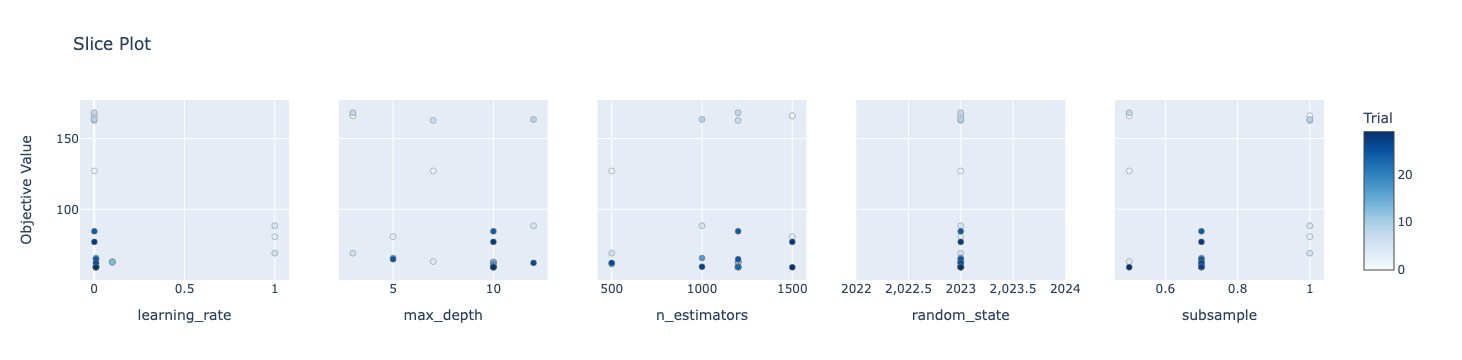

In [70]:
optuna.visualization.plot_slice(study)

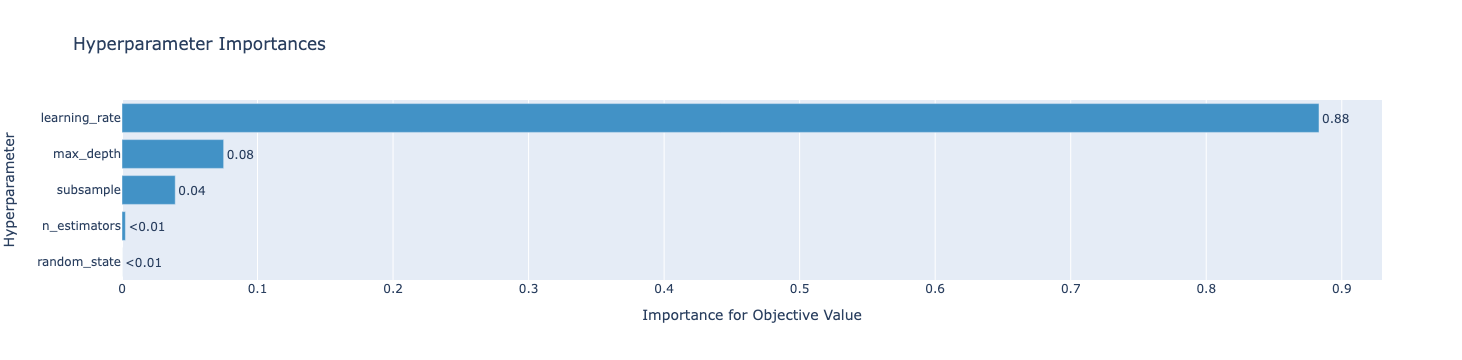

In [72]:
optuna.visualization.plot_param_importances(study)

#### Build Gradientboosting Regressor with Best Params

In [73]:
Best_trial = study.best_trial.params
Best_trial

{'subsample': 0.5,
 'learning_rate': 0.01,
 'n_estimators': 1500,
 'max_depth': 10,
 'random_state': 2023}

In [74]:
bestgrad=GradientBoostingRegressor(**Best_trial)

In [75]:
bestgrad.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=10, n_estimators=1500,
                          random_state=2023, subsample=0.5)

In [76]:
y_pred = bestgrad.predict(X_test) 
print("Score:",bestgrad.score(X_test,y_test))
print("RMSE:", sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:' , r2_score(y_test, y_pred))

Score: 0.8895489179102031
RMSE: 59.06981078956561
R2 Score: 0.8895489179102031


### RANDOMFOREST REGRESSOR 

Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap and Aggregation, commonly known as bagging. The basic idea behind this is to combine multiple decision trees in determining the final output rather than relying on individual decision trees. 
Random Forest has multiple decision trees as base learning models. We randomly perform row sampling and feature sampling from the dataset forming sample datasets for every model. This part is called Bootstrap.

We need to approach the Random Forest regression technique like any other machine learning technique 

In [77]:
# Firstly,Fit with GraidentBoostRegressor's default values to get idea abıut the model
forest=RandomForestRegressor(random_state=42)

In [78]:
forest.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [79]:
y_pred = forest.predict(X_test) 
print("Score:", forest.score(X_test,y_test))
print("RMSE:", sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:' , r2_score(y_test, y_pred))

Score: 0.8639662270442835
RMSE: 65.5547195877034
R2 Score: 0.8639662270442835


In [80]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False]

In [81]:
# Build model with parameters for Optuna
def objective(trial):

    param = {
        'min_samples_leaf': trial.suggest_categorical('min_samples_leaf', [1,3,4,5,10] ),
        'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt'] ),
        'min_samples_split': trial.suggest_categorical('min_samples_split', [2,4,6,10,12,15,20,25]),
        'n_estimators': trial.suggest_categorical('n_estimators', [50,100,500,1000,1500]),
        'max_depth': trial.suggest_categorical('max_depth', [3,5,7,10,12]), 
    }
    forest =RandomForestRegressor(**param)  
    
    forest.fit(X_train,y_train)
    
    preds = forest.predict(X_test)
    
    rmse = sqrt(mean_squared_error(y_test, preds))

    return rmse

In [82]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2023-04-17 11:06:48,298] A new study created in memory with name: no-name-e4028c70-b37c-4d7c-9e3a-7d7ad8255ecd
[I 2023-04-17 11:06:48,730] Trial 0 finished with value: 109.21023989676152 and parameters: {'min_samples_leaf': 1, 'max_features': 'auto', 'min_samples_split': 6, 'n_estimators': 50, 'max_depth': 5}. Best is trial 0 with value: 109.21023989676152.
[I 2023-04-17 11:07:06,155] Trial 1 finished with value: 67.79145736272835 and parameters: {'min_samples_leaf': 1, 'max_features': 'auto', 'min_samples_split': 15, 'n_estimators': 1000, 'max_depth': 12}. Best is trial 1 with value: 67.79145736272835.
[I 2023-04-17 11:07:23,143] Trial 2 finished with value: 82.04982980293865 and parameters: {'min_samples_leaf': 1, 'max_features': 'auto', 'min_samples_split': 10, 'n_estimators': 1500, 'max_depth': 7}. Best is trial 1 with value: 67.79145736272835.
[I 2023-04-17 11:07:23,410] Trial 3 finished with value: 93.88813032559092 and parameters: {'min_samples_leaf': 10, 'max_features': 'sqr

Number of finished trials: 30
Best trial: {'min_samples_leaf': 1, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 1500, 'max_depth': 12}


In [91]:
study.trials_dataframe()

number       value             datetime_start          datetime_complete  \
0        0  109.210240 2023-04-17 11:06:48.299758 2023-04-17 11:06:48.730171   
1        1   67.791457 2023-04-17 11:06:48.730856 2023-04-17 11:07:06.155254   
2        2   82.049830 2023-04-17 11:07:06.155967 2023-04-17 11:07:23.143396   
3        3   93.888130 2023-04-17 11:07:23.144115 2023-04-17 11:07:23.409906   
4        4   82.143544 2023-04-17 11:07:23.410575 2023-04-17 11:07:34.694638   
5        5   70.063362 2023-04-17 11:07:34.695358 2023-04-17 11:07:36.233794   
6        6  119.004963 2023-04-17 11:07:36.234464 2023-04-17 11:07:36.401241   
7        7  109.418948 2023-04-17 11:07:36.401924 2023-04-17 11:07:44.773978   
8        8   91.068374 2023-04-17 11:07:44.774685 2023-04-17 11:07:45.322341   
9        9   83.564297 2023-04-17 11:07:45.323209 2023-04-17 11:07:48.447122   
10      10   67.936292 2023-04-17 11:07:48.447833 2023-04-17 11:08:05.520394   
11      11   67.891226 2023-04-17 11:08:05.521121 2023-04-17 11:08:22.573315   
12      12   68.164527 2023-04-17 11:08:22.574005 2023-04-17 11:08:39.194114   
13      13  125.787065 2023-04-17 11:08:39.194845 2023-04-17 11:08:44.641752   
14      14   67.603998 2023-04-17 11:08:44.642430 2023-04-17 11:08:53.795362   
15      15   67.352828 2023-04-17 11:08:53.796097 2023-04-17 11:09:03.547830   
16      16  125.764424 2023-04-17 11:09:03.548548 2023-04-17 11:09:06.282932   
17      17   67.539203 2023-04-17 11:09:06.283656 2023-04-17 11:09:15.396601   
18      18   82.631920 2023-04-17 11:09:15.397324 2023-04-17 11:09:18.541882   
19      19   67.977456 2023-04-17 11:09:18.542601 2023-04-17 11:09:27.229811   
20      20  125.832929 2023-04-17 11:09:27.230527 2023-04-17 11:09:35.393422   
21      21   67.514916 2023-04-17 11:09:35.394138 2023-04-17 11:09:44.557097   
22      22   67.527266 2023-04-17 11:09:44.557835 2023-04-17 11:09:53.695154   
23      23   67.623361 2023-04-17 11:09:53.695877 2023-04-17 11:10:02.874686   
24      24   69.099656 2023-04-17 11:10:02.875409 2023-04-17 11:10:10.908478   
25      25   82.162662 2023-04-17 11:10:10.909191 2023-04-17 11:10:16.541687   
26      26   67.521479 2023-04-17 11:10:16.542397 2023-04-17 11:10:25.640399   
27      27   81.881578 2023-04-17 11:10:25.641120 2023-04-17 11:10:28.872165   
28      28   67.279406 2023-04-17 11:10:28.872891 2023-04-17 11:10:58.188164   
29      29  109.474451 2023-04-17 11:10:58.189113 2023-04-17 11:11:10.817534   

                 duration  params_max_depth params_max_features  \
0  0 days 00:00:00.430413                 5                auto   
1  0 days 00:00:17.424398                12                auto   
2  0 days 00:00:16.987429                 7                auto   
3  0 days 00:00:00.265791                10                sqrt   
4  0 days 00:00:11.284063                 7                auto   
5  0 days 00:00:01.538436                10                auto   
6  0 days 00:00:00.166777                 5                sqrt   
7  0 days 00:00:08.372054                 5                auto   
8  0 days 00:00:00.547656                10                sqrt   
9  0 days 00:00:03.123913                12                sqrt   
10 0 days 00:00:17.072561                12                auto   
11 0 days 00:00:17.052194                12                auto   
12 0 days 00:00:16.620109                12                auto   
13 0 days 00:00:05.446907                 3                auto   
14 0 days 00:00:09.152932                12                auto   
15 0 days 00:00:09.751733                12                auto   
16 0 days 00:00:02.734384                 3                auto   
17 0 days 00:00:09.112945                12                auto   
18 0 days 00:00:03.144558                12                sqrt   
19 0 days 00:00:08.687210                12                auto   
20 0 days 00:00:08.162895                 3                auto   
21 0 days 00:00:09.162959                12      

#### Build RandomForest Regressor with Best Params

In [92]:
Best_trial = study.best_trial.params
Best_trial

{'min_samples_leaf': 1,
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 1500,
 'max_depth': 12}

In [93]:
bestforest=RandomForestRegressor(**Best_trial)

In [94]:
bestforest.fit(X_train,y_train)

RandomForestRegressor(max_depth=12, n_estimators=1500)

In [95]:
y_pred = bestforest.predict(X_test) 
print("Score:", bestforest.score(X_test,y_test))
print("RMSE:", sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:' , r2_score(y_test, y_pred))

Score: 0.8566431895471223
RMSE: 67.29607842748064
R2 Score: 0.8566431895471223


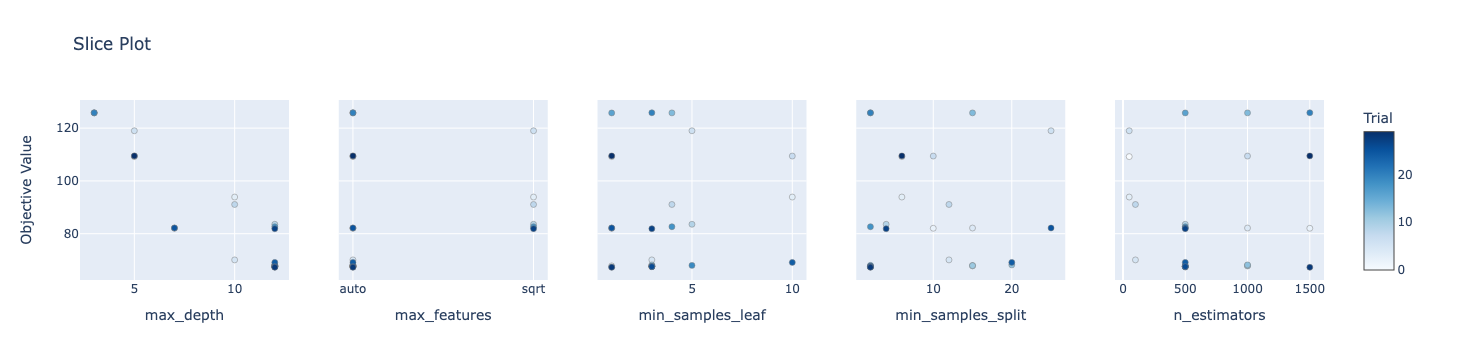

In [96]:
optuna.visualization.plot_slice(study)

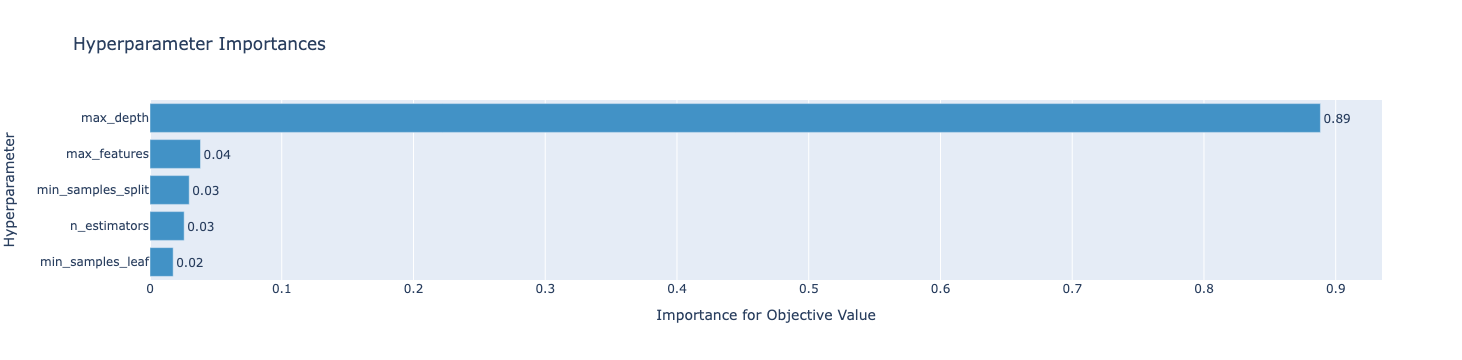

In [97]:
optuna.visualization.plot_param_importances(study)

### REGRESSION WITH XGBOOST 

XGBoost is an optimized distributed gradient boosting library designed for efficient and scalable training of machine learning models. It is an ensemble learning method that combines the predictions of multiple weak models to produce a stronger prediction. XGBoost stands for “Extreme Gradient Boosting” and it has become one of the most popular and widely used machine learning algorithms due to its ability to handle large datasets and its ability to achieve state-of-the-art performance in many machine learning tasks such as classification and regression.

One of the key features of XGBoost is its efficient handling of missing values, which allows it to handle real-world data with missing values without requiring significant pre-processing. Additionally, XGBoost has built-in support for parallel processing, making it possible to train models on large datasets in a reasonable amount of time.

XGBoost can be used in a variety of applications, including Kaggle competitions, recommendation systems, and click-through rate prediction, among others. It is also highly customizable and allows for fine-tuning of various model parameters to optimize performance.

XgBoost stands for Extreme Gradient Boosting, which was proposed by the researchers at the University of Washington. It is a library written in C++ which optimizes the training for Gradient Boosting.

Advantages of XGBoost:

Performance: XGBoost has a strong track record of producing high-quality results in various machine learning tasks, especially in Kaggle competitions, where it has been a popular choice for winning solutions.
Scalability: XGBoost is designed for efficient and scalable training of machine learning models, making it suitable for large datasets.
Customizability: XGBoost has a wide range of hyperparameters that can be adjusted to optimize performance, making it highly customizable.
Handling of Missing Values: XGBoost has built-in support for handling missing values, making it easy to work with real-world data that often has missing values.
Interpretability: Unlike some machine learning algorithms that can be difficult to interpret, XGBoost provides feature importances, allowing for a better understanding of which variables are most important in making predictions.

Disadvantages of XGBoost:

Computational Complexity: XGBoost can be computationally intensive, especially when training large models, making it less suitable for resource-constrained systems.
Overfitting: XGBoost can be prone to overfitting, especially when trained on small datasets or when too many trees are used in the model.
Hyperparameter Tuning: XGBoost has many hyperparameters that can be adjusted, making it important to properly tune the parameters to optimize performance. However, finding the optimal set of parameters can be time-consuming and requires expertise.
Memory Requirements: XGBoost can be memory-intensive, especially when working with large datasets, making it less suitable for systems with limited memory resources.


In [143]:
ml_df = pd.get_dummies(data=df, columns=["month","hour","season","holiday","weekday","weather",'workingday'],drop_first=True)
ml_df.columns

Index(['temp', 'atemp', 'humidity', 'windspeed', 'count', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12', 'hour_1', 'hour_2', 'hour_3',
       'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10',
       'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16',
       'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22',
       'hour_23', 'season_2', 'season_3', 'season_4', 'holiday_1', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'weather_2', 'weather_3', 'weather_4', 'workingday_1'],
      dtype='object')

In [144]:
X_dummy = ml_df.drop("count",axis=1) 
y_dummy = ml_df["count"]

In [145]:
# SPLIT DATA INTO TRAIN AND TEST
X_dtrain, X_dtest, y_dtrain, y_dtest = train_test_split(X_dummy,y_dummy, test_size=0.3, shuffle=True, random_state=42)
X_dtrain.shape, X_dtest.shape, y_dtrain.shape, y_dtest.shape

((12165, 52), (5214, 52), (12165,), (5214,))

In [116]:
xgboost=XGBRegressor(objective ='reg:squarederror',random_state=42)

In [146]:
xgboost.fit(X_dtrain,y_dtrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [148]:
y_pred = xgboost.predict(X_dtest) 
print("Score:",xgboost.score(X_dtest,y_dtest))
print("RMSE:", sqrt(mean_squared_error(y_dtest, y_pred)))
print('R2 Score:' , r2_score(y_dtest, y_pred))

Score: 0.8367536575054519
RMSE: 71.81287636178759
R2 Score: 0.8367536575054519


#### USING OPTUNA TO FIND BEST PARAMS

Optuna is an automatic hyperparameter optimization software framework, particularly designed for machine learning. It features an imperative, define-by-run style user API. 

In [149]:
# Build model with parameters for Optuna
def objective(trial):

    param = {
        
        # hyperparameter settings
        
        'max_depth': trial.suggest_int('max_depth', 1, 17),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.15),
        'n_estimators': trial.suggest_int('n_estimators', 50, 1500),
        'subsample': trial.suggest_float('subsample', 0.01, 0.65),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 0.95),
        "reg_alpha":trial.suggest_float("reg_alpha",0.1,0.5),
        "reg_lambda":trial.suggest_float("reg_lambda",0.1,0.5),
        
        # non-hyperparameter settings
        
        "n_jobs":-1, # deploy 100% of gpu's computational power 
        "random_state":42
    }
    
    model =XGBRegressor(**param,objective ='reg:squarederror')  
    
    model.fit(X_train,y_train,eval_set=[(X_test,y_test)],early_stopping_rounds=100,verbose=False)
    
    preds = model.predict(X_test)
    
    rmse = sqrt(mean_squared_error(y_test, preds))

    return rmse

In [150]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2023-04-17 11:38:45,913] A new study created in memory with name: no-name-215592b6-896c-44ab-8c70-cfb65ae97a91
[I 2023-04-17 11:38:48,914] Trial 0 finished with value: 107.87938697857525 and parameters: {'max_depth': 1, 'learning_rate': 0.10620893284452035, 'n_estimators': 1230, 'subsample': 0.37255606064595054, 'colsample_bytree': 0.5393008841564861, 'reg_alpha': 0.15139285676988545, 'reg_lambda': 0.3101013732591589}. Best is trial 0 with value: 107.87938697857525.
[I 2023-04-17 11:38:50,245] Trial 1 finished with value: 95.66149313528696 and parameters: {'max_depth': 12, 'learning_rate': 0.10776901673603248, 'n_estimators': 882, 'subsample': 0.025877244587337603, 'colsample_bytree': 0.7098174596321934, 'reg_alpha': 0.3133190017863088, 'reg_lambda': 0.3970785915599254}. Best is trial 1 with value: 95.66149313528696.
[I 2023-04-17 11:38:52,322] Trial 2 finished with value: 80.66854509760982 and parameters: {'max_depth': 2, 'learning_rate': 0.08164162863120382, 'n_estimators': 660, '

Number of finished trials: 30
Best trial: {'max_depth': 5, 'learning_rate': 0.06711887159260686, 'n_estimators': 1036, 'subsample': 0.5812309173481067, 'colsample_bytree': 0.7961677247293251, 'reg_alpha': 0.20677995686028078, 'reg_lambda': 0.35569066626856166}


In [151]:
study.trials_dataframe()

number       value             datetime_start          datetime_complete  \
0        0  107.879387 2023-04-17 11:38:45.918250 2023-04-17 11:38:48.914329   
1        1   95.661493 2023-04-17 11:38:48.915230 2023-04-17 11:38:50.244957   
2        2   80.668545 2023-04-17 11:38:50.245844 2023-04-17 11:38:52.322413   
3        3   72.887795 2023-04-17 11:38:52.323576 2023-04-17 11:38:57.343224   
4        4   70.865211 2023-04-17 11:38:57.344088 2023-04-17 11:39:00.730717   
5        5   72.840695 2023-04-17 11:39:00.731604 2023-04-17 11:39:02.696774   
6        6  125.496687 2023-04-17 11:39:02.697600 2023-04-17 11:39:03.095112   
7        7   84.990506 2023-04-17 11:39:03.096229 2023-04-17 11:39:08.035241   
8        8   79.118726 2023-04-17 11:39:08.036092 2023-04-17 11:39:10.311282   
9        9  126.961090 2023-04-17 11:39:10.312296 2023-04-17 11:39:11.773762   
10      10   74.806472 2023-04-17 11:39:11.775204 2023-04-17 11:39:14.227120   
11      11   78.673998 2023-04-17 11:39:14.228743 2023-04-17 11:39:15.740115   
12      12   69.272355 2023-04-17 11:39:15.741494 2023-04-17 11:39:19.132656   
13      13   79.091112 2023-04-17 11:39:19.133439 2023-04-17 11:39:23.148631   
14      14   70.254377 2023-04-17 11:39:23.149688 2023-04-17 11:39:28.860209   
15      15   72.743837 2023-04-17 11:39:28.861337 2023-04-17 11:39:31.454410   
16      16   70.385754 2023-04-17 11:39:31.455918 2023-04-17 11:39:35.466879   
17      17   71.349104 2023-04-17 11:39:35.467711 2023-04-17 11:39:44.620268   
18      18   69.985269 2023-04-17 11:39:44.621081 2023-04-17 11:39:50.000535   
19      19   68.031449 2023-04-17 11:39:50.001723 2023-04-17 11:39:54.615032   
20      20   67.818631 2023-04-17 11:39:54.615872 2023-04-17 11:39:59.990638   
21      21   67.546194 2023-04-17 11:39:59.991458 2023-04-17 11:40:06.864823   
22      22   70.228765 2023-04-17 11:40:06.865651 2023-04-17 11:40:11.817628   
23      23   67.705329 2023-04-17 11:40:11.818526 2023-04-17 11:40:16.985960   
24      24  108.285770 2023-04-17 11:40:16.987359 2023-04-17 11:40:20.237431   
25      25   68.617994 2023-04-17 11:40:20.238335 2023-04-17 11:40:26.403517   
26      26   67.861319 2023-04-17 11:40:26.404386 2023-04-17 11:40:32.357828   
27      27   68.122537 2023-04-17 11:40:32.358985 2023-04-17 11:40:39.173362   
28      28   69.622000 2023-04-17 11:40:39.174206 2023-04-17 11:40:43.917771   
29      29  108.054141 2023-04-17 11:40:43.918696 2023-04-17 11:40:46.983859   

                 duration  params_colsample_bytree  params_learning_rate  \
0  0 days 00:00:02.996079                 0.539301              0.106209   
1  0 days 00:00:01.329727                 0.709817              0.107769   
2  0 days 00:00:02.076569                 0.405034              0.081642   
3  0 days 00:00:05.019648                 0.513749              0.063109   
4  0 days 00:00:03.386629                 0.639871              0.029498   
5  0 days 00:00:01.965170                 0.683013              0.067232   
6  0 days 00:00:00.397512                 0.041096              0.090626   
7  0 days 00:00:04.939012                 0.143980              0.033739   
8  0 days 00:00:02.275190                 0.626219              0.074733   
9  0 days 00:00:01.461466                 0.070928              0.014359   
10 0 days 00:00:02.451916                 0.894439              0.140155   
11 0 days 00:00:01.511372                 0.789209              0.043398   
12 0 days 00:00:03.391162                 0.935220              0.049461   
13 0 days 00:00:04.015192                 0.907461              0.012558   
14 0 days 00:00:05.710521                 0.926961              0.043689   
15 0 days 00:00:02.593073                 0.885647              0.050797   
16 0 days 00:00:04.010961                 0.925479              0.053812   
17 0 days 00:00:09.152557                 0.790466              0.035011   
18 0 days 00:00:05.379454                 0.943104              0.057473   
19 

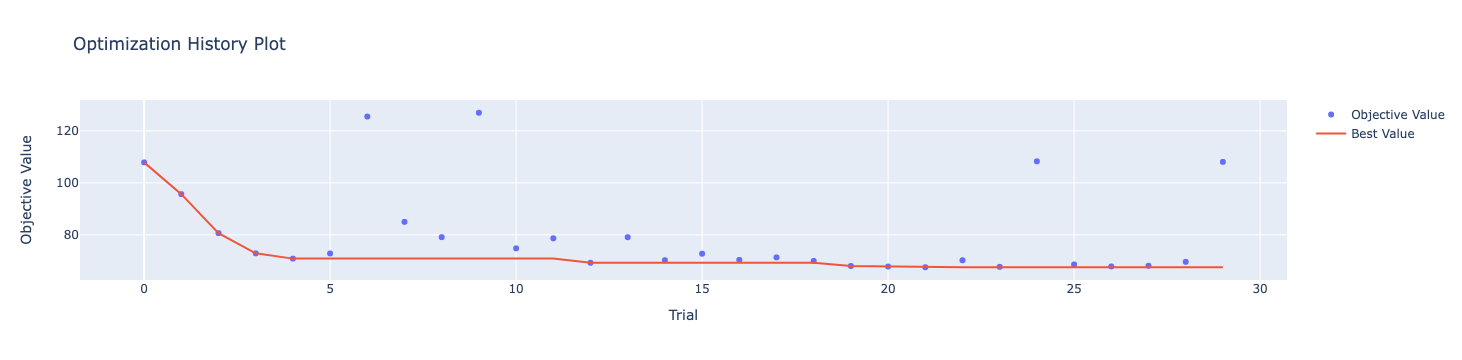

In [152]:
optuna.visualization.plot_optimization_history(study)

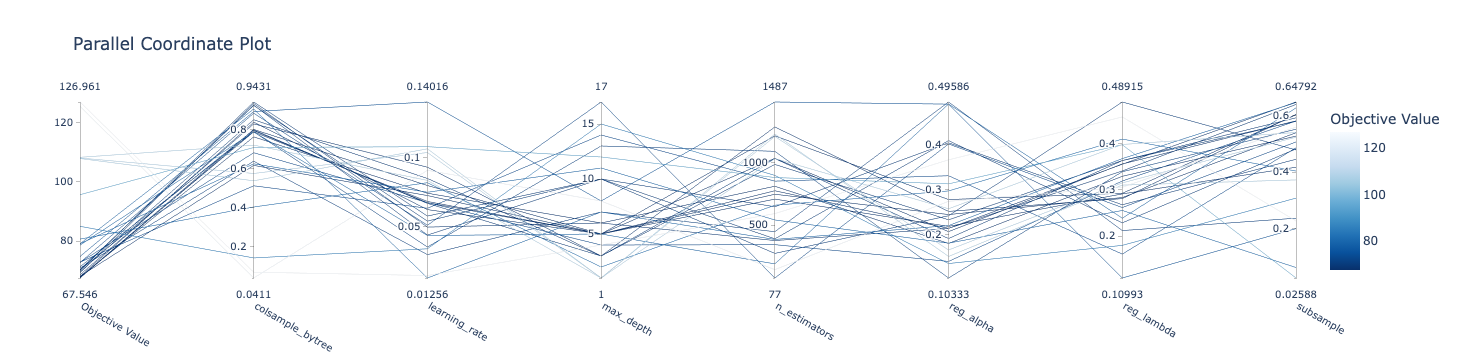

In [153]:
optuna.visualization.plot_parallel_coordinate(study)

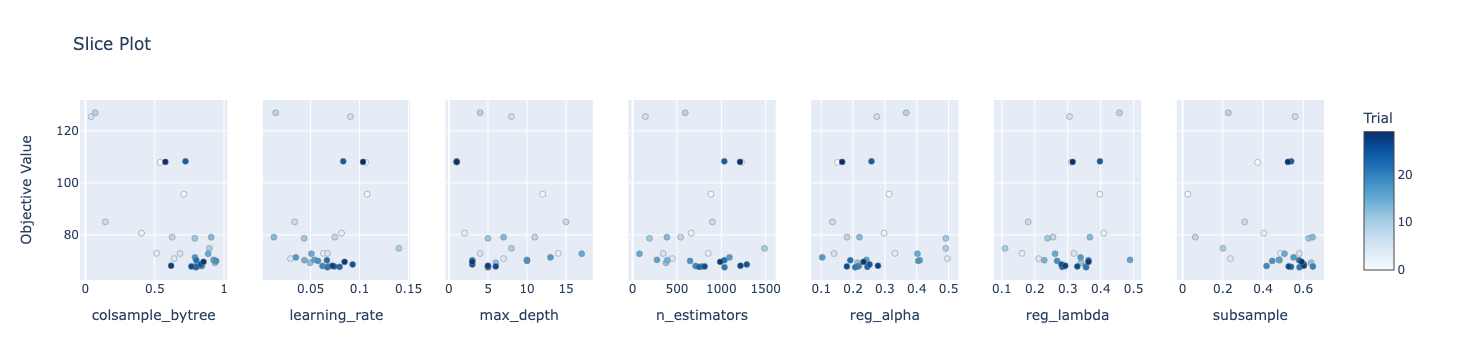

In [154]:
optuna.visualization.plot_slice(study)

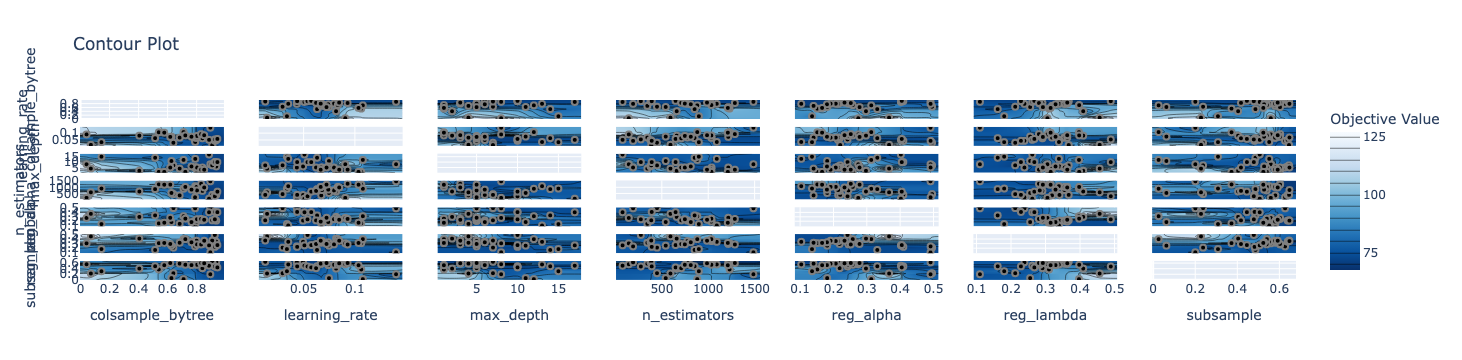

In [216]:
optuna.visualization.plot_contour(study, params=['reg_lambda',
                            'max_depth',
                            'n_estimators',
                            'colsample_bytree',
                            'subsample',
                            'learning_rate',
                            'reg_alpha'])

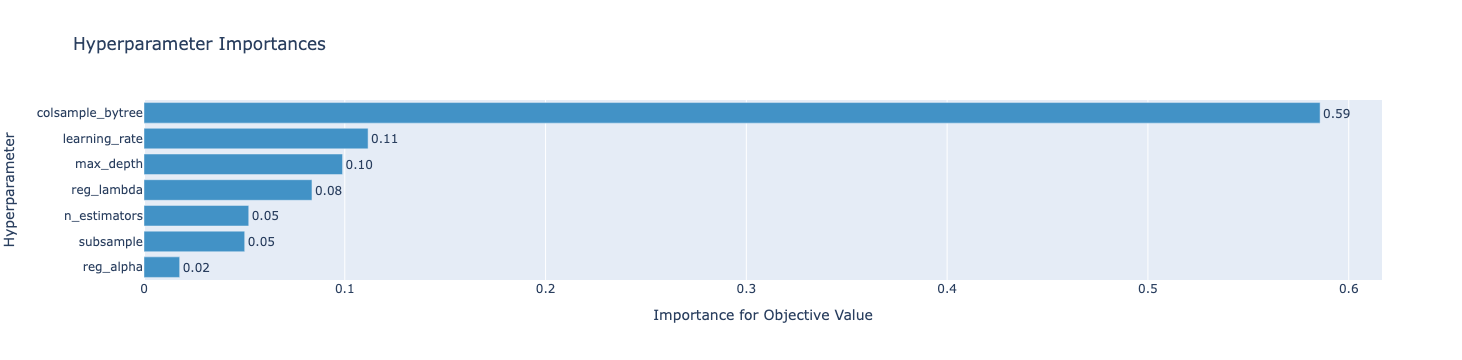

In [156]:
optuna.visualization.plot_param_importances(study)

####  Build Best XGBOOST MODEL

In [170]:
Best_trial = study.best_trial.params
Best_trial

{'max_depth': 5,
 'learning_rate': 0.06711887159260686,
 'n_estimators': 1036,
 'subsample': 0.5812309173481067,
 'colsample_bytree': 0.7961677247293251,
 'reg_alpha': 0.20677995686028078,
 'reg_lambda': 0.35569066626856166}

In [171]:
model=XGBRegressor(objective ='reg:squarederror',**Best_trial)
model.fit(X_dtrain,y_dtrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7961677247293251, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.06711887159260686,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1036, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [175]:
preds = model.predict(X_dtest)

In [177]:
y_pred = model.predict(X_dtest) 
print("Score:",model.score(X_dtest,y_dtest))
print("RMSE:", np.sqrt(mean_squared_error(y_dtest, y_pred)))
print('R2 Score:', r2_score(y_dtest,y_pred))

Score: 0.8550788546753652
RMSE: 67.66225554587858
R2 Score: 0.8550788546753652


In [178]:
# SAVE MODEL

import joblib
from joblib import dump, load
# Save a model to file
dump(model, filename="xgbmodel.joblib") 

['xgbmodel.joblib']

#### FEATURE IMPORTANCE WITH SHAPLEY 

SHAP (SHapley Additive exPlanations) is a game theoretic approach to explain the output of any machine learning model. It connects optimal credit allocation with local explanations using the classic Shapley values from game theory and their related extensions (see papers for details and citations.

In [162]:
import shap

In [168]:
from shap.maskers import Independent
from shap import TreeExplainer, Explanation
from shap.plots import waterfall
xgb_explainer = shap.TreeExplainer(model, X_dtrain, feature_names=X_dtrain.columns.tolist())

In [169]:
shap_explainer_values = xgb_explainer(X_dtrain, y_dtrain)

100%|===================| 12129/12165 [03:13<00:00]        

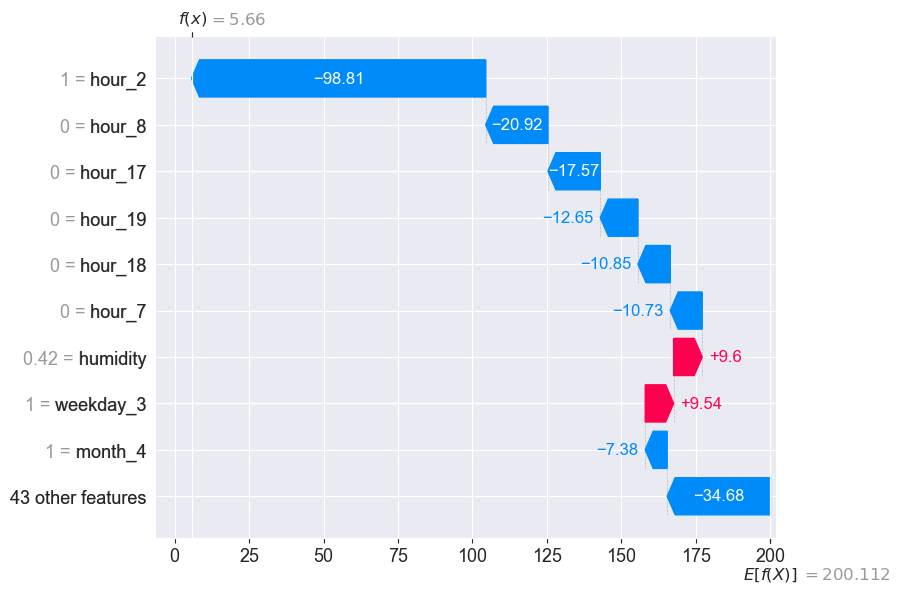

In [172]:
shap.waterfall_plot(shap_explainer_values[0])

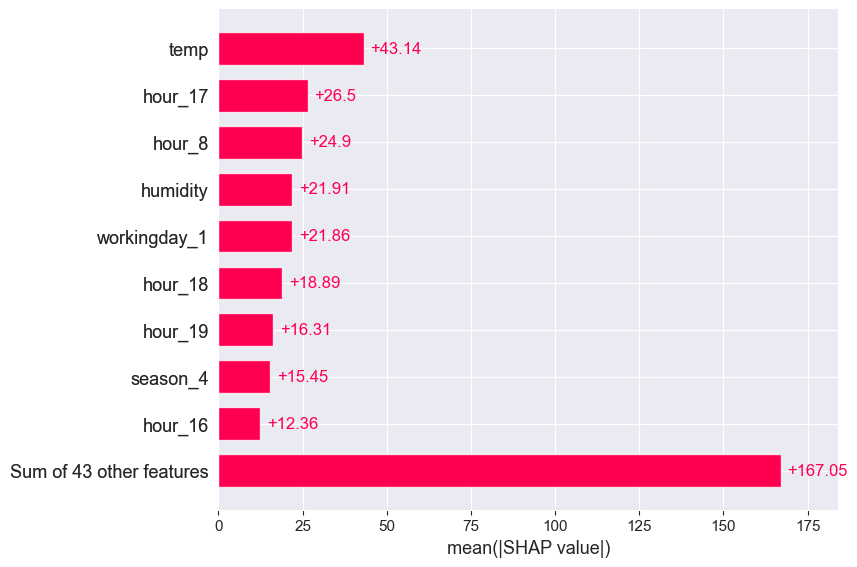

In [173]:
shap.plots.bar(shap_explainer_values)

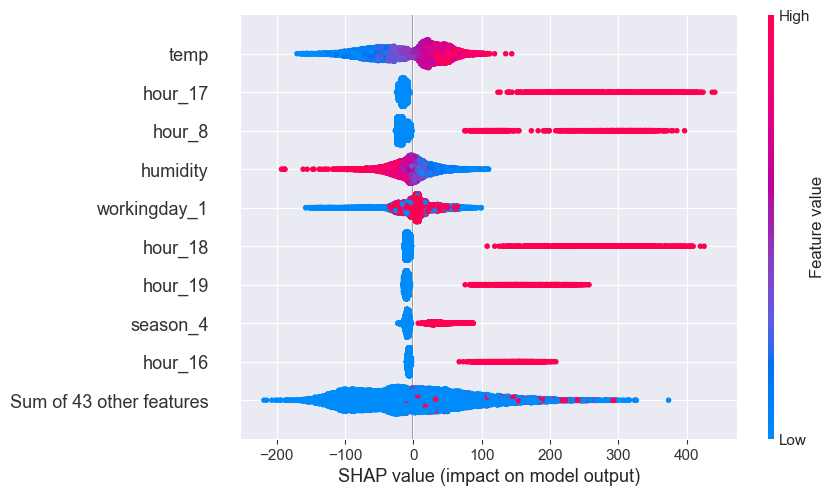

In [174]:
shap.plots.beeswarm(shap_explainer_values)

### REGRESSION MODEL LIGHTGBM

LightGBM is a gradient boosting framework based on decision trees to increases the efficiency of the model and reduces memory usage. 
It uses two novel techniques: Gradient-based One Side Sampling and Exclusive Feature Bundling (EFB) which fulfills the limitations of histogram-based algorithm that is primarily used in all GBDT (Gradient Boosting Decision Tree) frameworks. The two techniques of GOSS and EFB described below form the characteristics of LightGBM Algorithm. They comprise together to make the model work efficiently and provide it a cutting edge over other GBDT frameworks 

Gradient-based One Side Sampling Technique for LightGBM: 

Different data instances have varied roles in the computation of information gain. The instances with larger gradients(i.e., under-trained instances) will contribute more to the information gain. GOSS keeps those instances with large gradients (e.g., larger than a predefined threshold, or among the top percentiles), and only randomly drop those instances with small gradients  to retain the accuracy of information gain estimation. This  treatment can lead to a more accurate gain estimation than uniformly random sampling, with the same target sampling rate, especially when the value of information gain has a large range. 

Architecture : 

LightGBM splits the tree leaf-wise as opposed to other boosting algorithms that grow tree level-wise. It chooses the leaf with maximum delta loss to grow. Since the leaf is fixed, the leaf-wise algorithm has lower loss compared to the level-wise algorithm. Leaf-wise tree growth might increase the complexity of the model and may lead to overfitting in small datasets.

Parameter Tuning 
Few important parameters and their usage is listed below : 

-max_depth : It sets a limit on the depth of tree. The default value is 20. It is effective in controlling over fitting.

-categorical_feature : It specifies the categorical feature used for training model.

-bagging_fraction : It specifies the fraction of data to be considered for each iteration.

-num_iterations : It specifies the number of iterations to be performed. The default value is 100.

-num_leaves : It specifies the number of leaves in a tree. It should be smaller than the square of max_depth.

-max_bin : It specifies the maximum number of bins to bucket the feature values.

-min_data_in_bin : It specifies minimum amount of data in one bin.

-task : It specifies the task we wish to perform which is either train or prediction. The default entry is train. Another possible value for this parameter is prediction.

-feature_fraction : It specifies the fraction of features to be considered in each iteration. The default value is one.

In [223]:
data=pd.read_csv('hour.csv')

In [224]:
y=data['cnt']
X=data.drop(['cnt','instant','dteday','yr',"registered","casual"],axis=1)


In [225]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, shuffle=True, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12165, 11), (5214, 11), (12165,), (5214,))

In [226]:
#conda install lightgbm

In [227]:
import lightgbm as lgb
from lightgbm import LGBMRegressor

In [213]:
lgbm= LGBMRegressor(random_seed=42, n_estimators=500, max_depth=10, num_leaves=90, min_gain_to_split=0.6)
  

lgbm.fit(X_train ,y_train)
pred = lgbm.predict(X_test)
rmse = MSE(y_test, pred)**(1/2)
print("XGBoost RMSE: {:.3f}".format(rmse),"\n","\nr^2: {:3f}".format(lgbm.score(X_test,y_test)))

XGBoost RMSE: 58.877 
 
r^2: 0.890267


In [277]:
def objective(trial):
    params = {
        # Hyperparameter settings
        "n_estimators": trial.suggest_int("n_estimators", 500,1000, step=100),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.5),
        "num_leaves": trial.suggest_int("num_leaves", 6, 300, step=20),
        "max_depth": trial.suggest_int("max_depth", 3, 20),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 200, 1000, step=100),
        "min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.5, 0.95),
        "max_bin": trial.suggest_int("max_bin", 200, 300),
        "lambda_l1": trial.suggest_int("lambda_l1", 0, 100, step=5),
        "lambda_l2": trial.suggest_int("lambda_l2", 0, 100, step=5),
        "bagging_freq": trial.suggest_categorical("bagging_freq", [1]),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.2, 0.95),
        # non-hyperparameter settings
        "n_jobs":-1,
        "random_state":42
    }
    
    model =LGBMRegressor(**params)  
    
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    
    rmse = sqrt(mean_squared_error(y_test, preds))

    return rmse

In [278]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2023-04-17 15:21:16,991] A new study created in memory with name: no-name-964c6a70-debc-40c2-9435-b1fb4322b35b


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_gain_to_split is set=12.732113395244001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=12.732113395244001
[LightGBM] [Warning] feature_fraction is set=0.6138835009697583, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6138835009697583
[LightGBM] [Warning] bagging_fraction is set=0.7609464329344018, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7609464329344018
[LightGBM] [Warning] lambda_l2 is set=75, reg_lambda=0.0 will be ignored. Current value: lambda_l2=75
[LightGBM] [Warning] min_data_in_leaf is set=900, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=900
[LightGBM] [Warning] lambda_l1 is set=40, reg_alpha=0.0 will be ignored. Current value: lambda_l1=40


[I 2023-04-17 15:21:17,645] Trial 0 finished with value: 58.76715755529856 and parameters: {'n_estimators': 800, 'learning_rate': 0.16287304581466963, 'num_leaves': 86, 'max_depth': 18, 'min_data_in_leaf': 900, 'min_gain_to_split': 12.732113395244001, 'bagging_fraction': 0.7609464329344018, 'max_bin': 262, 'lambda_l1': 40, 'lambda_l2': 75, 'bagging_freq': 1, 'feature_fraction': 0.6138835009697583}. Best is trial 0 with value: 58.76715755529856.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_gain_to_split is set=11.48686237532331, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=11.48686237532331
[LightGBM] [Warning] feature_fraction is set=0.31738025803541065, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.31738025803541065
[LightGBM] [Warning] bagging_fraction is set=0.9461891653148978, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9461891653148978
[LightGBM] [Warning] lambda_l2 is set=65, reg_lambda=0.0 will be ignored. Current value: lambda_l2=65
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] lambda_l1 is set=95, reg_alpha=0.0 will be ignored. Current value: lambda_l1=95


[I 2023-04-17 15:21:18,080] Trial 1 finished with value: 61.83065099499826 and parameters: {'n_estimators': 600, 'learning_rate': 0.27429030034162943, 'num_leaves': 106, 'max_depth': 8, 'min_data_in_leaf': 1000, 'min_gain_to_split': 11.48686237532331, 'bagging_fraction': 0.9461891653148978, 'max_bin': 242, 'lambda_l1': 95, 'lambda_l2': 65, 'bagging_freq': 1, 'feature_fraction': 0.31738025803541065}. Best is trial 0 with value: 58.76715755529856.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_gain_to_split is set=5.178273096289166, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.178273096289166
[LightGBM] [Warning] feature_fraction is set=0.40252355916436977, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.40252355916436977
[LightGBM] [Warning] bagging_fraction is set=0.5972261361919112, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5972261361919112
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5


[I 2023-04-17 15:21:18,619] Trial 2 finished with value: 69.17426392756354 and parameters: {'n_estimators': 900, 'learning_rate': 0.07868290976193747, 'num_leaves': 266, 'max_depth': 6, 'min_data_in_leaf': 1000, 'min_gain_to_split': 5.178273096289166, 'bagging_fraction': 0.5972261361919112, 'max_bin': 272, 'lambda_l1': 5, 'lambda_l2': 5, 'bagging_freq': 1, 'feature_fraction': 0.40252355916436977}. Best is trial 0 with value: 58.76715755529856.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_gain_to_split is set=3.5721085467045075, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.5721085467045075
[LightGBM] [Warning] feature_fraction is set=0.8040865315950552, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8040865315950552
[LightGBM] [Warning] bagging_fraction is set=0.7053931145790379, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7053931145790379
[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] lambda_l1 is set=25, reg_alpha=0.0 will be ignored. Current value: lambda_l1=25


[I 2023-04-17 15:21:19,285] Trial 3 finished with value: 48.75575550758944 and parameters: {'n_estimators': 700, 'learning_rate': 0.42821136588255976, 'num_leaves': 146, 'max_depth': 12, 'min_data_in_leaf': 500, 'min_gain_to_split': 3.5721085467045075, 'bagging_fraction': 0.7053931145790379, 'max_bin': 204, 'lambda_l1': 25, 'lambda_l2': 30, 'bagging_freq': 1, 'feature_fraction': 0.8040865315950552}. Best is trial 3 with value: 48.75575550758944.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_gain_to_split is set=11.364497070265813, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=11.364497070265813
[LightGBM] [Warning] feature_fraction is set=0.31250968118901506, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.31250968118901506
[LightGBM] [Warning] bagging_fraction is set=0.6843719744042132, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6843719744042132
[LightGBM] [Warning] lambda_l2 is set=60, reg_lambda=0.0 will be ignored. Current value: lambda_l2=60
[LightGBM] [Warning] min_data_in_leaf is set=900, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=900
[LightGBM] [Warning] lambda_l1 is set=15, reg_alpha=0.0 will be ignored. Current value: lambda_l1=15


[I 2023-04-17 15:21:19,632] Trial 4 finished with value: 66.61116013949021 and parameters: {'n_estimators': 500, 'learning_rate': 0.15790799909813769, 'num_leaves': 186, 'max_depth': 6, 'min_data_in_leaf': 900, 'min_gain_to_split': 11.364497070265813, 'bagging_fraction': 0.6843719744042132, 'max_bin': 216, 'lambda_l1': 15, 'lambda_l2': 60, 'bagging_freq': 1, 'feature_fraction': 0.31250968118901506}. Best is trial 3 with value: 48.75575550758944.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_gain_to_split is set=4.6699939401319615, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.6699939401319615
[LightGBM] [Warning] feature_fraction is set=0.5545879927208173, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5545879927208173
[LightGBM] [Warning] bagging_fraction is set=0.738166978480262, subsample=1.0 will be ignored. Current value: bagging_fraction=0.738166978480262
[LightGBM] [Warning] lambda_l2 is set=45, reg_lambda=0.0 will be ignored. Current value: lambda_l2=45
[LightGBM] [Warning] min_data_in_leaf is set=600, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=600
[LightGBM] [Warning] lambda_l1 is set=65, reg_alpha=0.0 will be ignored. Current value: lambda_l1=65


[I 2023-04-17 15:21:20,085] Trial 5 finished with value: 61.90486507964449 and parameters: {'n_estimators': 500, 'learning_rate': 0.040199261967283864, 'num_leaves': 246, 'max_depth': 14, 'min_data_in_leaf': 600, 'min_gain_to_split': 4.6699939401319615, 'bagging_fraction': 0.738166978480262, 'max_bin': 249, 'lambda_l1': 65, 'lambda_l2': 45, 'bagging_freq': 1, 'feature_fraction': 0.5545879927208173}. Best is trial 3 with value: 48.75575550758944.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_gain_to_split is set=14.821016295821247, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=14.821016295821247
[LightGBM] [Warning] feature_fraction is set=0.8749085023295109, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8749085023295109
[LightGBM] [Warning] bagging_fraction is set=0.8735567779305469, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8735567779305469
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] lambda_l1 is set=35, reg_alpha=0.0 will be ignored. Current value: lambda_l1=35


[I 2023-04-17 15:21:20,895] Trial 6 finished with value: 46.4699633649369 and parameters: {'n_estimators': 500, 'learning_rate': 0.30399150137391234, 'num_leaves': 226, 'max_depth': 13, 'min_data_in_leaf': 200, 'min_gain_to_split': 14.821016295821247, 'bagging_fraction': 0.8735567779305469, 'max_bin': 264, 'lambda_l1': 35, 'lambda_l2': 20, 'bagging_freq': 1, 'feature_fraction': 0.8749085023295109}. Best is trial 6 with value: 46.4699633649369.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_gain_to_split is set=1.9902000171705954, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.9902000171705954
[LightGBM] [Warning] feature_fraction is set=0.8976294910744962, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8976294910744962
[LightGBM] [Warning] bagging_fraction is set=0.8084775661232799, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8084775661232799
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] min_data_in_leaf is set=600, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=600
[LightGBM] [Warning] lambda_l1 is set=85, reg_alpha=0.0 will be ignored. Current value: lambda_l1=85


[I 2023-04-17 15:21:21,282] Trial 7 finished with value: 54.094166604130294 and parameters: {'n_estimators': 800, 'learning_rate': 0.4115887174154671, 'num_leaves': 66, 'max_depth': 3, 'min_data_in_leaf': 600, 'min_gain_to_split': 1.9902000171705954, 'bagging_fraction': 0.8084775661232799, 'max_bin': 256, 'lambda_l1': 85, 'lambda_l2': 10, 'bagging_freq': 1, 'feature_fraction': 0.8976294910744962}. Best is trial 6 with value: 46.4699633649369.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_gain_to_split is set=2.4262343720090263, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.4262343720090263
[LightGBM] [Warning] feature_fraction is set=0.8233954175770584, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8233954175770584
[LightGBM] [Warning] bagging_fraction is set=0.8782636328940843, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8782636328940843
[LightGBM] [Warning] lambda_l2 is set=90, reg_lambda=0.0 will be ignored. Current value: lambda_l2=90
[LightGBM] [Warning] min_data_in_leaf is set=800, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=800
[LightGBM] [Warning] lambda_l1 is set=40, reg_alpha=0.0 will be ignored. Current value: lambda_l1=40


[I 2023-04-17 15:21:21,740] Trial 8 finished with value: 68.49951491853767 and parameters: {'n_estimators': 600, 'learning_rate': 0.0840842509968422, 'num_leaves': 226, 'max_depth': 3, 'min_data_in_leaf': 800, 'min_gain_to_split': 2.4262343720090263, 'bagging_fraction': 0.8782636328940843, 'max_bin': 205, 'lambda_l1': 40, 'lambda_l2': 90, 'bagging_freq': 1, 'feature_fraction': 0.8233954175770584}. Best is trial 6 with value: 46.4699633649369.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_gain_to_split is set=2.9858045859041145, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.9858045859041145
[LightGBM] [Warning] feature_fraction is set=0.5301996178870805, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5301996178870805
[LightGBM] [Warning] bagging_fraction is set=0.5100136057348358, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5100136057348358
[LightGBM] [Warning] lambda_l2 is set=95, reg_lambda=0.0 will be ignored. Current value: lambda_l2=95
[LightGBM] [Warning] min_data_in_leaf is set=600, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=600
[LightGBM] [Warning] lambda_l1 is set=60, reg_alpha=0.0 will be ignored. Current value: lambda_l1=60


[I 2023-04-17 15:21:22,732] Trial 9 finished with value: 56.88002302475352 and parameters: {'n_estimators': 1000, 'learning_rate': 0.19598079472996957, 'num_leaves': 186, 'max_depth': 11, 'min_data_in_leaf': 600, 'min_gain_to_split': 2.9858045859041145, 'bagging_fraction': 0.5100136057348358, 'max_bin': 203, 'lambda_l1': 60, 'lambda_l2': 95, 'bagging_freq': 1, 'feature_fraction': 0.5301996178870805}. Best is trial 6 with value: 46.4699633649369.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_gain_to_split is set=14.461544139572279, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=14.461544139572279
[LightGBM] [Warning] feature_fraction is set=0.9210119470802611, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9210119470802611
[LightGBM] [Warning] bagging_fraction is set=0.8470735406343473, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8470735406343473
[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] lambda_l1 is set=75, reg_alpha=0.0 will be ignored. Current value: lambda_l1=75


[I 2023-04-17 15:21:23,062] Trial 10 finished with value: 55.33735675770489 and parameters: {'n_estimators': 600, 'learning_rate': 0.325680476237127, 'num_leaves': 6, 'max_depth': 20, 'min_data_in_leaf': 200, 'min_gain_to_split': 14.461544139572279, 'bagging_fraction': 0.8470735406343473, 'max_bin': 299, 'lambda_l1': 75, 'lambda_l2': 30, 'bagging_freq': 1, 'feature_fraction': 0.9210119470802611}. Best is trial 6 with value: 46.4699633649369.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_gain_to_split is set=8.325138868781824, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=8.325138868781824
[LightGBM] [Warning] feature_fraction is set=0.7647558270411653, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7647558270411653
[LightGBM] [Warning] bagging_fraction is set=0.6677833032796908, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6677833032796908
[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20


[I 2023-04-17 15:21:24,178] Trial 11 finished with value: 43.78688808451265 and parameters: {'n_estimators': 700, 'learning_rate': 0.4952986538663399, 'num_leaves': 146, 'max_depth': 14, 'min_data_in_leaf': 200, 'min_gain_to_split': 8.325138868781824, 'bagging_fraction': 0.6677833032796908, 'max_bin': 232, 'lambda_l1': 20, 'lambda_l2': 30, 'bagging_freq': 1, 'feature_fraction': 0.7647558270411653}. Best is trial 11 with value: 43.78688808451265.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_gain_to_split is set=9.253021983898659, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=9.253021983898659
[LightGBM] [Warning] feature_fraction is set=0.7255957617523648, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7255957617523648
[LightGBM] [Warning] bagging_fraction is set=0.649976921440968, subsample=1.0 will be ignored. Current value: bagging_fraction=0.649976921440968
[LightGBM] [Warning] lambda_l2 is set=25, reg_lambda=0.0 will be ignored. Current value: lambda_l2=25
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] lambda_l1 is set=25, reg_alpha=0.0 will be ignored. Current value: lambda_l1=25


[I 2023-04-17 15:21:25,234] Trial 12 finished with value: 47.41948023255838 and parameters: {'n_estimators': 700, 'learning_rate': 0.4970067072261599, 'num_leaves': 286, 'max_depth': 15, 'min_data_in_leaf': 200, 'min_gain_to_split': 9.253021983898659, 'bagging_fraction': 0.649976921440968, 'max_bin': 230, 'lambda_l1': 25, 'lambda_l2': 25, 'bagging_freq': 1, 'feature_fraction': 0.7255957617523648}. Best is trial 11 with value: 43.78688808451265.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_gain_to_split is set=7.169848306171422, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.169848306171422
[LightGBM] [Warning] feature_fraction is set=0.7149990140414191, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7149990140414191
[LightGBM] [Warning] bagging_fraction is set=0.7896940320261657, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7896940320261657
[LightGBM] [Warning] lambda_l2 is set=45, reg_lambda=0.0 will be ignored. Current value: lambda_l2=45
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0


[I 2023-04-17 15:21:25,759] Trial 13 finished with value: 46.55816452251967 and parameters: {'n_estimators': 500, 'learning_rate': 0.3607065442138314, 'num_leaves': 186, 'max_depth': 16, 'min_data_in_leaf': 400, 'min_gain_to_split': 7.169848306171422, 'bagging_fraction': 0.7896940320261657, 'max_bin': 280, 'lambda_l1': 0, 'lambda_l2': 45, 'bagging_freq': 1, 'feature_fraction': 0.7149990140414191}. Best is trial 11 with value: 43.78688808451265.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_gain_to_split is set=14.66747059269714, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=14.66747059269714
[LightGBM] [Warning] feature_fraction is set=0.9474795843472483, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9474795843472483
[LightGBM] [Warning] bagging_fraction is set=0.9185601991809634, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9185601991809634
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=40, reg_alpha=0.0 will be ignored. Current value: lambda_l1=40


[I 2023-04-17 15:21:26,978] Trial 14 finished with value: 48.85147766846622 and parameters: {'n_estimators': 900, 'learning_rate': 0.49534466202052724, 'num_leaves': 146, 'max_depth': 11, 'min_data_in_leaf': 300, 'min_gain_to_split': 14.66747059269714, 'bagging_fraction': 0.9185601991809634, 'max_bin': 234, 'lambda_l1': 40, 'lambda_l2': 20, 'bagging_freq': 1, 'feature_fraction': 0.9474795843472483}. Best is trial 11 with value: 43.78688808451265.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_gain_to_split is set=8.988653883145282, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=8.988653883145282
[LightGBM] [Warning] feature_fraction is set=0.7985135352943585, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7985135352943585
[LightGBM] [Warning] bagging_fraction is set=0.8567290240482405, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8567290240482405
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=25, reg_alpha=0.0 will be ignored. Current value: lambda_l1=25


[I 2023-04-17 15:21:27,825] Trial 15 finished with value: 47.10613143180094 and parameters: {'n_estimators': 700, 'learning_rate': 0.26997569286493517, 'num_leaves': 206, 'max_depth': 13, 'min_data_in_leaf': 400, 'min_gain_to_split': 8.988653883145282, 'bagging_fraction': 0.8567290240482405, 'max_bin': 223, 'lambda_l1': 25, 'lambda_l2': 0, 'bagging_freq': 1, 'feature_fraction': 0.7985135352943585}. Best is trial 11 with value: 43.78688808451265.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_gain_to_split is set=0.27239782251790334, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.27239782251790334
[LightGBM] [Warning] feature_fraction is set=0.7072989191736776, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7072989191736776
[LightGBM] [Warning] bagging_fraction is set=0.8035048612837576, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8035048612837576
[LightGBM] [Warning] lambda_l2 is set=40, reg_lambda=0.0 will be ignored. Current value: lambda_l2=40
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=50, reg_alpha=0.0 will be ignored. Current value: lambda_l1=50


[I 2023-04-17 15:21:28,585] Trial 16 finished with value: 44.761408912023775 and parameters: {'n_estimators': 600, 'learning_rate': 0.33731290319350926, 'num_leaves': 126, 'max_depth': 17, 'min_data_in_leaf': 300, 'min_gain_to_split': 0.27239782251790334, 'bagging_fraction': 0.8035048612837576, 'max_bin': 284, 'lambda_l1': 50, 'lambda_l2': 40, 'bagging_freq': 1, 'feature_fraction': 0.7072989191736776}. Best is trial 11 with value: 43.78688808451265.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_gain_to_split is set=0.6075266369265852, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.6075266369265852
[LightGBM] [Warning] feature_fraction is set=0.6572842403008998, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6572842403008998
[LightGBM] [Warning] bagging_fraction is set=0.7598724632543011, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7598724632543011
[LightGBM] [Warning] lambda_l2 is set=40, reg_lambda=0.0 will be ignored. Current value: lambda_l2=40
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=65, reg_alpha=0.0 will be ignored. Current value: lambda_l1=65


[I 2023-04-17 15:21:29,309] Trial 17 finished with value: 48.55105656505492 and parameters: {'n_estimators': 600, 'learning_rate': 0.37336926720798613, 'num_leaves': 46, 'max_depth': 17, 'min_data_in_leaf': 400, 'min_gain_to_split': 0.6075266369265852, 'bagging_fraction': 0.7598724632543011, 'max_bin': 297, 'lambda_l1': 65, 'lambda_l2': 40, 'bagging_freq': 1, 'feature_fraction': 0.6572842403008998}. Best is trial 11 with value: 43.78688808451265.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_gain_to_split is set=0.1167999125698998, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.1167999125698998
[LightGBM] [Warning] feature_fraction is set=0.7223977907652662, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7223977907652662
[LightGBM] [Warning] bagging_fraction is set=0.6502707622565297, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6502707622565297
[LightGBM] [Warning] lambda_l2 is set=55, reg_lambda=0.0 will be ignored. Current value: lambda_l2=55
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=50, reg_alpha=0.0 will be ignored. Current value: lambda_l1=50


[I 2023-04-17 15:21:30,225] Trial 18 finished with value: 45.44542172304917 and parameters: {'n_estimators': 800, 'learning_rate': 0.42994378410911593, 'num_leaves': 126, 'max_depth': 19, 'min_data_in_leaf': 300, 'min_gain_to_split': 0.1167999125698998, 'bagging_fraction': 0.6502707622565297, 'max_bin': 284, 'lambda_l1': 50, 'lambda_l2': 55, 'bagging_freq': 1, 'feature_fraction': 0.7223977907652662}. Best is trial 11 with value: 43.78688808451265.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_gain_to_split is set=6.062722136619717, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=6.062722136619717
[LightGBM] [Warning] feature_fraction is set=0.4601097350215826, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4601097350215826
[LightGBM] [Warning] bagging_fraction is set=0.8118553294644834, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8118553294644834
[LightGBM] [Warning] lambda_l2 is set=75, reg_lambda=0.0 will be ignored. Current value: lambda_l2=75
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=55, reg_alpha=0.0 will be ignored. Current value: lambda_l1=55


[I 2023-04-17 15:21:30,983] Trial 19 finished with value: 49.29353206880149 and parameters: {'n_estimators': 700, 'learning_rate': 0.2431434382596183, 'num_leaves': 146, 'max_depth': 9, 'min_data_in_leaf': 300, 'min_gain_to_split': 6.062722136619717, 'bagging_fraction': 0.8118553294644834, 'max_bin': 240, 'lambda_l1': 55, 'lambda_l2': 75, 'bagging_freq': 1, 'feature_fraction': 0.4601097350215826}. Best is trial 11 with value: 43.78688808451265.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_gain_to_split is set=7.714117792808496, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.714117792808496
[LightGBM] [Warning] feature_fraction is set=0.620157352139201, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.620157352139201
[LightGBM] [Warning] bagging_fraction is set=0.727278673967253, subsample=1.0 will be ignored. Current value: bagging_fraction=0.727278673967253
[LightGBM] [Warning] lambda_l2 is set=35, reg_lambda=0.0 will be ignored. Current value: lambda_l2=35
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] lambda_l1 is set=15, reg_alpha=0.0 will be ignored. Current value: lambda_l1=15


[I 2023-04-17 15:21:31,483] Trial 20 finished with value: 51.18984634380909 and parameters: {'n_estimators': 600, 'learning_rate': 0.4595170391086937, 'num_leaves': 26, 'max_depth': 16, 'min_data_in_leaf': 500, 'min_gain_to_split': 7.714117792808496, 'bagging_fraction': 0.727278673967253, 'max_bin': 288, 'lambda_l1': 15, 'lambda_l2': 35, 'bagging_freq': 1, 'feature_fraction': 0.620157352139201}. Best is trial 11 with value: 43.78688808451265.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_gain_to_split is set=0.002295456205078039, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.002295456205078039
[LightGBM] [Warning] feature_fraction is set=0.7091902335398002, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7091902335398002
[LightGBM] [Warning] bagging_fraction is set=0.6546717899069743, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6546717899069743
[LightGBM] [Warning] lambda_l2 is set=55, reg_lambda=0.0 will be ignored. Current value: lambda_l2=55
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=50, reg_alpha=0.0 will be ignored. Current value: lambda_l1=50


[I 2023-04-17 15:21:32,281] Trial 21 finished with value: 44.86792424809262 and parameters: {'n_estimators': 800, 'learning_rate': 0.4260743946075652, 'num_leaves': 106, 'max_depth': 20, 'min_data_in_leaf': 300, 'min_gain_to_split': 0.002295456205078039, 'bagging_fraction': 0.6546717899069743, 'max_bin': 282, 'lambda_l1': 50, 'lambda_l2': 55, 'bagging_freq': 1, 'feature_fraction': 0.7091902335398002}. Best is trial 11 with value: 43.78688808451265.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_gain_to_split is set=1.2790346223021662, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.2790346223021662
[LightGBM] [Warning] feature_fraction is set=0.6897560753839168, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6897560753839168
[LightGBM] [Warning] bagging_fraction is set=0.6750120896245868, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6750120896245868
[LightGBM] [Warning] lambda_l2 is set=50, reg_lambda=0.0 will be ignored. Current value: lambda_l2=50
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=75, reg_alpha=0.0 will be ignored. Current value: lambda_l1=75


[I 2023-04-17 15:21:33,175] Trial 22 finished with value: 46.11457676154049 and parameters: {'n_estimators': 900, 'learning_rate': 0.38267590964872267, 'num_leaves': 106, 'max_depth': 18, 'min_data_in_leaf': 300, 'min_gain_to_split': 1.2790346223021662, 'bagging_fraction': 0.6750120896245868, 'max_bin': 273, 'lambda_l1': 75, 'lambda_l2': 50, 'bagging_freq': 1, 'feature_fraction': 0.6897560753839168}. Best is trial 11 with value: 43.78688808451265.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_gain_to_split is set=0.09639896468633413, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.09639896468633413
[LightGBM] [Warning] feature_fraction is set=0.7499902254520876, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7499902254520876
[LightGBM] [Warning] bagging_fraction is set=0.6138081355200048, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6138081355200048
[LightGBM] [Warning] lambda_l2 is set=70, reg_lambda=0.0 will be ignored. Current value: lambda_l2=70
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] lambda_l1 is set=50, reg_alpha=0.0 will be ignored. Current value: lambda_l1=50


[I 2023-04-17 15:21:34,077] Trial 23 finished with value: 46.83799711485265 and parameters: {'n_estimators': 800, 'learning_rate': 0.4629205866760452, 'num_leaves': 106, 'max_depth': 20, 'min_data_in_leaf': 200, 'min_gain_to_split': 0.09639896468633413, 'bagging_fraction': 0.6138081355200048, 'max_bin': 291, 'lambda_l1': 50, 'lambda_l2': 70, 'bagging_freq': 1, 'feature_fraction': 0.7499902254520876}. Best is trial 11 with value: 43.78688808451265.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_gain_to_split is set=1.5710175329518024, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.5710175329518024
[LightGBM] [Warning] feature_fraction is set=0.6432006786048492, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6432006786048492
[LightGBM] [Warning] bagging_fraction is set=0.7241107479990608, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7241107479990608
[LightGBM] [Warning] lambda_l2 is set=15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=15
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] lambda_l1 is set=30, reg_alpha=0.0 will be ignored. Current value: lambda_l1=30


[I 2023-04-17 15:21:34,643] Trial 24 finished with value: 47.48569180157899 and parameters: {'n_estimators': 700, 'learning_rate': 0.35598810258888125, 'num_leaves': 66, 'max_depth': 17, 'min_data_in_leaf': 500, 'min_gain_to_split': 1.5710175329518024, 'bagging_fraction': 0.7241107479990608, 'max_bin': 275, 'lambda_l1': 30, 'lambda_l2': 15, 'bagging_freq': 1, 'feature_fraction': 0.6432006786048492}. Best is trial 11 with value: 43.78688808451265.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_gain_to_split is set=3.611253085065932, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.611253085065932
[LightGBM] [Warning] feature_fraction is set=0.781671391965624, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.781671391965624
[LightGBM] [Warning] bagging_fraction is set=0.7731536438401183, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7731536438401183
[LightGBM] [Warning] lambda_l2 is set=35, reg_lambda=0.0 will be ignored. Current value: lambda_l2=35
[LightGBM] [Warning] min_data_in_leaf is set=700, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=700
[LightGBM] [Warning] lambda_l1 is set=15, reg_alpha=0.0 will be ignored. Current value: lambda_l1=15


[I 2023-04-17 15:21:35,392] Trial 25 finished with value: 53.74392973236199 and parameters: {'n_estimators': 1000, 'learning_rate': 0.40744384421061386, 'num_leaves': 166, 'max_depth': 19, 'min_data_in_leaf': 700, 'min_gain_to_split': 3.611253085065932, 'bagging_fraction': 0.7731536438401183, 'max_bin': 250, 'lambda_l1': 15, 'lambda_l2': 35, 'bagging_freq': 1, 'feature_fraction': 0.781671391965624}. Best is trial 11 with value: 43.78688808451265.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_gain_to_split is set=1.1125879271317416, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.1125879271317416
[LightGBM] [Warning] feature_fraction is set=0.8500864389859316, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8500864389859316
[LightGBM] [Warning] bagging_fraction is set=0.6127591151762217, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6127591151762217
[LightGBM] [Warning] lambda_l2 is set=55, reg_lambda=0.0 will be ignored. Current value: lambda_l2=55
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=45, reg_alpha=0.0 will be ignored. Current value: lambda_l1=45


[I 2023-04-17 15:21:36,051] Trial 26 finished with value: 42.08833164884506 and parameters: {'n_estimators': 800, 'learning_rate': 0.4546798587321563, 'num_leaves': 126, 'max_depth': 15, 'min_data_in_leaf': 400, 'min_gain_to_split': 1.1125879271317416, 'bagging_fraction': 0.6127591151762217, 'max_bin': 266, 'lambda_l1': 45, 'lambda_l2': 55, 'bagging_freq': 1, 'feature_fraction': 0.8500864389859316}. Best is trial 26 with value: 42.08833164884506.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_gain_to_split is set=2.0520848879965037, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.0520848879965037
[LightGBM] [Warning] feature_fraction is set=0.8615537289364354, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8615537289364354
[LightGBM] [Warning] bagging_fraction is set=0.5889774359962326, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5889774359962326
[LightGBM] [Warning] lambda_l2 is set=85, reg_lambda=0.0 will be ignored. Current value: lambda_l2=85
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=75, reg_alpha=0.0 will be ignored. Current value: lambda_l1=75


[I 2023-04-17 15:21:36,618] Trial 27 finished with value: 52.3027066218316 and parameters: {'n_estimators': 700, 'learning_rate': 0.4617167521467398, 'num_leaves': 126, 'max_depth': 15, 'min_data_in_leaf': 400, 'min_gain_to_split': 2.0520848879965037, 'bagging_fraction': 0.5889774359962326, 'max_bin': 265, 'lambda_l1': 75, 'lambda_l2': 85, 'bagging_freq': 1, 'feature_fraction': 0.8615537289364354}. Best is trial 26 with value: 42.08833164884506.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_gain_to_split is set=1.2111474856176736, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.2111474856176736
[LightGBM] [Warning] feature_fraction is set=0.8472515809996217, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8472515809996217
[LightGBM] [Warning] bagging_fraction is set=0.7011402323604329, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7011402323604329
[LightGBM] [Warning] lambda_l2 is set=45, reg_lambda=0.0 will be ignored. Current value: lambda_l2=45
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] lambda_l1 is set=45, reg_alpha=0.0 will be ignored. Current value: lambda_l1=45


[I 2023-04-17 15:21:38,393] Trial 28 finished with value: 41.67809535080595 and parameters: {'n_estimators': 900, 'learning_rate': 0.3906068839768132, 'num_leaves': 166, 'max_depth': 14, 'min_data_in_leaf': 200, 'min_gain_to_split': 1.2111474856176736, 'bagging_fraction': 0.7011402323604329, 'max_bin': 217, 'lambda_l1': 45, 'lambda_l2': 45, 'bagging_freq': 1, 'feature_fraction': 0.8472515809996217}. Best is trial 28 with value: 41.67809535080595.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_gain_to_split is set=4.4293264785617605, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.4293264785617605
[LightGBM] [Warning] feature_fraction is set=0.8513724252478789, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8513724252478789
[LightGBM] [Warning] bagging_fraction is set=0.6990573714816144, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6990573714816144
[LightGBM] [Warning] lambda_l2 is set=80, reg_lambda=0.0 will be ignored. Current value: lambda_l2=80
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] lambda_l1 is set=40, reg_alpha=0.0 will be ignored. Current value: lambda_l1=40


[I 2023-04-17 15:21:39,468] Trial 29 finished with value: 44.24461246276485 and parameters: {'n_estimators': 900, 'learning_rate': 0.3983590568362575, 'num_leaves': 166, 'max_depth': 10, 'min_data_in_leaf': 200, 'min_gain_to_split': 4.4293264785617605, 'bagging_fraction': 0.6990573714816144, 'max_bin': 214, 'lambda_l1': 40, 'lambda_l2': 80, 'bagging_freq': 1, 'feature_fraction': 0.8513724252478789}. Best is trial 28 with value: 41.67809535080595.


Number of finished trials: 30
Best trial: {'n_estimators': 900, 'learning_rate': 0.3906068839768132, 'num_leaves': 166, 'max_depth': 14, 'min_data_in_leaf': 200, 'min_gain_to_split': 1.2111474856176736, 'bagging_fraction': 0.7011402323604329, 'max_bin': 217, 'lambda_l1': 45, 'lambda_l2': 45, 'bagging_freq': 1, 'feature_fraction': 0.8472515809996217}


In [279]:
study.trials_dataframe()

number      value             datetime_start          datetime_complete  \
0        0  58.767158 2023-04-17 15:21:16.997119 2023-04-17 15:21:17.645202   
1        1  61.830651 2023-04-17 15:21:17.646062 2023-04-17 15:21:18.080560   
2        2  69.174264 2023-04-17 15:21:18.081547 2023-04-17 15:21:18.619620   
3        3  48.755756 2023-04-17 15:21:18.620630 2023-04-17 15:21:19.285315   
4        4  66.611160 2023-04-17 15:21:19.286498 2023-04-17 15:21:19.632283   
5        5  61.904865 2023-04-17 15:21:19.633285 2023-04-17 15:21:20.084692   
6        6  46.469963 2023-04-17 15:21:20.086387 2023-04-17 15:21:20.895219   
7        7  54.094167 2023-04-17 15:21:20.896166 2023-04-17 15:21:21.282569   
8        8  68.499515 2023-04-17 15:21:21.283488 2023-04-17 15:21:21.739949   
9        9  56.880023 2023-04-17 15:21:21.741189 2023-04-17 15:21:22.732567   
10      10  55.337357 2023-04-17 15:21:22.733556 2023-04-17 15:21:23.062632   
11      11  43.786888 2023-04-17 15:21:23.063605 2023-04-17 15:21:24.178304   
12      12  47.419480 2023-04-17 15:21:24.179249 2023-04-17 15:21:25.234278   
13      13  46.558165 2023-04-17 15:21:25.235434 2023-04-17 15:21:25.759208   
14      14  48.851478 2023-04-17 15:21:25.760096 2023-04-17 15:21:26.978244   
15      15  47.106131 2023-04-17 15:21:26.979366 2023-04-17 15:21:27.825441   
16      16  44.761409 2023-04-17 15:21:27.826329 2023-04-17 15:21:28.585127   
17      17  48.551057 2023-04-17 15:21:28.586102 2023-04-17 15:21:29.309469   
18      18  45.445422 2023-04-17 15:21:29.310458 2023-04-17 15:21:30.224996   
19      19  49.293532 2023-04-17 15:21:30.225910 2023-04-17 15:21:30.983561   
20      20  51.189846 2023-04-17 15:21:30.984755 2023-04-17 15:21:31.482828   
21      21  44.867924 2023-04-17 15:21:31.483755 2023-04-17 15:21:32.280727   
22      22  46.114577 2023-04-17 15:21:32.281646 2023-04-17 15:21:33.174712   
23      23  46.837997 2023-04-17 15:21:33.176440 2023-04-17 15:21:34.077180   
24      24  47.485692 2023-04-17 15:21:34.078296 2023-04-17 15:21:34.643100   
25      25  53.743930 2023-04-17 15:21:34.644092 2023-04-17 15:21:35.391512   
26      26  42.088332 2023-04-17 15:21:35.392757 2023-04-17 15:21:36.051610   
27      27  52.302707 2023-04-17 15:21:36.052587 2023-04-17 15:21:36.618548   
28      28  41.678095 2023-04-17 15:21:36.619431 2023-04-17 15:21:38.393023   
29      29  44.244612 2023-04-17 15:21:38.394014 2023-04-17 15:21:39.468187   

                 duration  params_bagging_fraction  params_bagging_freq  \
0  0 days 00:00:00.648083                 0.760946                    1   
1  0 days 00:00:00.434498                 0.946189                    1   
2  0 days 00:00:00.538073                 0.597226                    1   
3  0 days 00:00:00.664685                 0.705393                    1   
4  0 days 00:00:00.345785                 0.684372                    1   
5  0 days 00:00:00.451407                 0.738167                    1   
6  0 days 00:00:00.808832                 0.873557                    1   
7  0 days 00:00:00.386403                 0.808478                    1   
8  0 days 00:00:00.456461                 0.878264                    1   
9  0 days 00:00:00.991378                 0.510014                    1   
10 0 days 00:00:00.329076                 0.847074                    1   
11 0 days 00:00:01.114699                 0.667783                    1   
12 0 days 00:00:01.055029                 0.649977                    1   
13 0 days 00:00:00.523774                 0.789694                    1   
14 0 days 00:00:01.218148                 0.918560                    1   
15 0 days 00:00:00.846075                 0.856729                    1   
16 0 days 00:00:00.758798                 0.803505                    1   
17 0 days 00:00:00.723367                 0.759872                    1   
18 0 days 00:00:00.914538                 0.650271                    1   
19 0 days 00:00:00.757651                 0.811855    

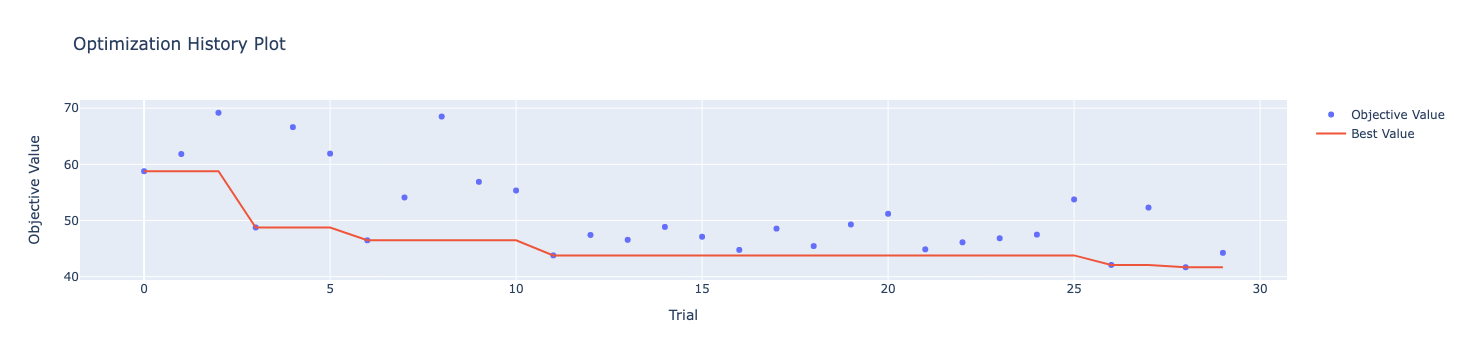

In [280]:
optuna.visualization.plot_optimization_history(study)

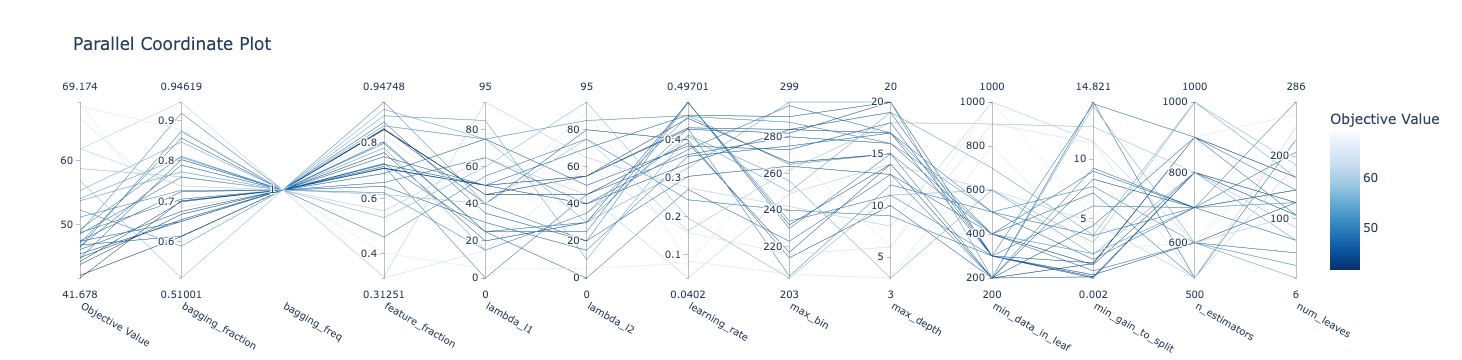

In [281]:
optuna.visualization.plot_parallel_coordinate(study)

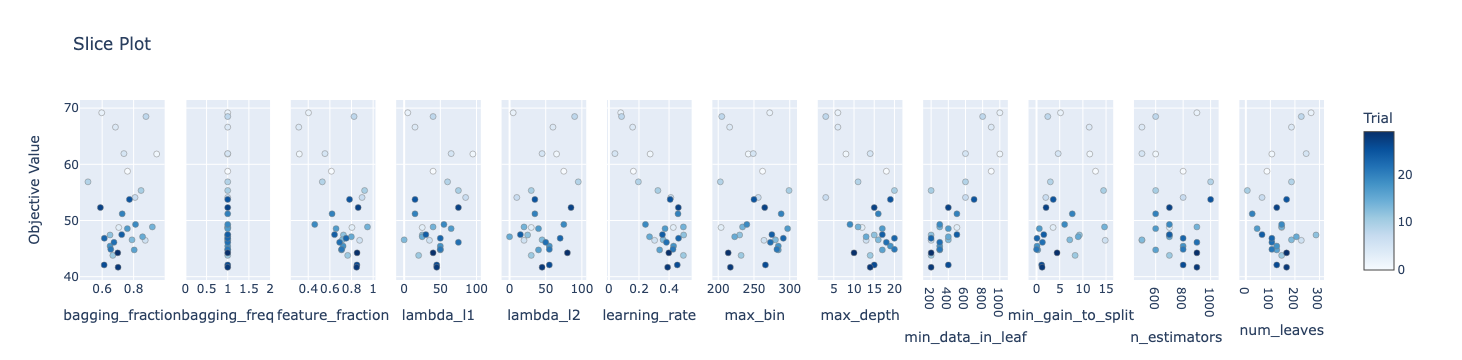

In [282]:
optuna.visualization.plot_slice(study)

[W 2023-04-17 15:21:56,135] Param bagging_freq unique value length is less than 2.
[W 2023-04-17 15:21:56,145] Param bagging_freq unique value length is less than 2.
[W 2023-04-17 15:21:56,148] Param bagging_freq unique value length is less than 2.
[W 2023-04-17 15:21:56,149] Param bagging_freq unique value length is less than 2.
[W 2023-04-17 15:21:56,150] Param bagging_freq unique value length is less than 2.
[W 2023-04-17 15:21:56,151] Param bagging_freq unique value length is less than 2.
[W 2023-04-17 15:21:56,152] Param bagging_freq unique value length is less than 2.
[W 2023-04-17 15:21:56,152] Param bagging_freq unique value length is less than 2.
[W 2023-04-17 15:21:56,153] Param bagging_freq unique value length is less than 2.
[W 2023-04-17 15:21:56,153] Param bagging_freq unique value length is less than 2.
[W 2023-04-17 15:21:56,154] Param bagging_freq unique value length is less than 2.
[W 2023-04-17 15:21:56,154] Param bagging_freq unique value length is less than 2.
[W 2

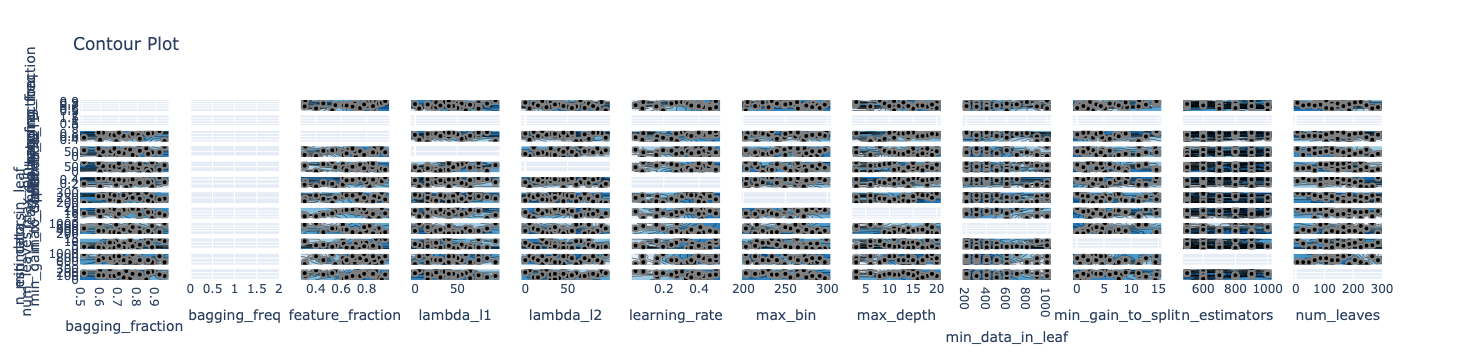

In [283]:
optuna.visualization.plot_contour(study, params=["n_estimators",
        "learning_rate",
        "num_leaves",
        "max_depth",
        "min_data_in_leaf",
        "max_bin",
        "lambda_l1",
        "lambda_l2",
        "min_gain_to_split",
        "bagging_fraction",
        "bagging_freq",
        "feature_fraction"])

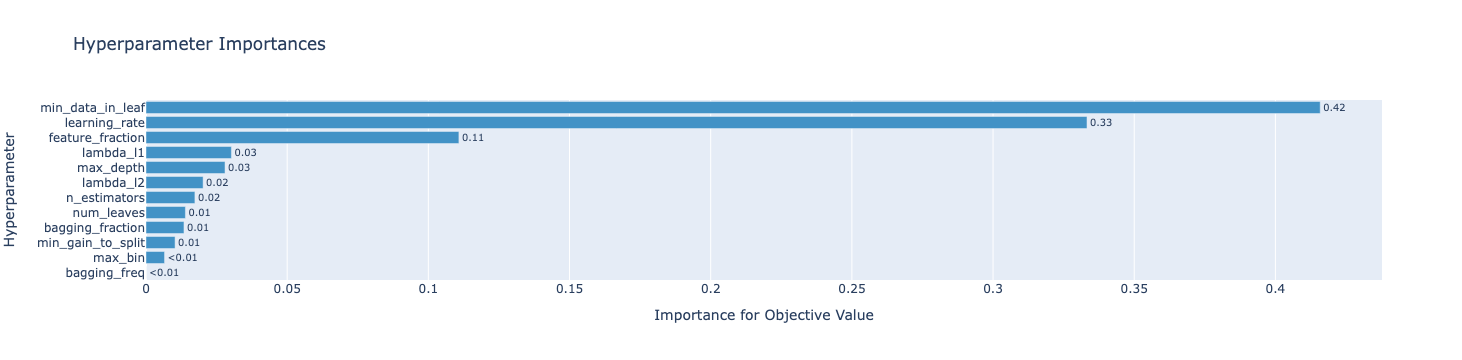

In [284]:
optuna.visualization.plot_param_importances(study)

In [285]:
Best_trial = study.best_trial.params
Best_trial

{'n_estimators': 900,
 'learning_rate': 0.3906068839768132,
 'num_leaves': 166,
 'max_depth': 14,
 'min_data_in_leaf': 200,
 'min_gain_to_split': 1.2111474856176736,
 'bagging_fraction': 0.7011402323604329,
 'max_bin': 217,
 'lambda_l1': 45,
 'lambda_l2': 45,
 'bagging_freq': 1,
 'feature_fraction': 0.8472515809996217}

In [286]:
lgbm= LGBMRegressor(**Best_trial)
  

lgbm.fit(X_train ,y_train)
pred = lgbm.predict(X_test)
rmse = MSE(y_test, pred)**(1/2)
print("XGBoost RMSE: {:.3f}".format(rmse),"\n","\nr^2: {:3f}".format(lgbm.score(X_test,y_test)))

[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] lambda_l2 is set=45, reg_lambda=0.0 will be ignored. Current value: lambda_l2=45
[LightGBM] [Warning] feature_fraction is set=0.8472515809996217, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8472515809996217
[LightGBM] [Warning] bagging_fraction is set=0.7011402323604329, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7011402323604329
[LightGBM] [Warning] min_gain_to_split is set=1.2111474856176736, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.2111474856176736
[LightGBM] [Warning] lambda_l1 is set=45, reg_alpha=0.0 will be ignored. Current value: lambda_l1=45
XGBoost RMSE: 47.230 
 
r^2: 0.957024


In [288]:
lgbm= LGBMRegressor(n_estimators= 900, learning_rate= 0.3906068839768132, num_leaves=166, max_depth= 14,
                    min_data_in_leaf= 200, min_gain_to_split= 4.429, bagging_fraction=0.69905737, max_bin=217, lambda_l1= 40, lambda_l2= 80, bagging_freq=1,
                    feature_fraction= 0.8472515809996217)
  

lgbm.fit(X_train ,y_train)
pred = lgbm.predict(X_test)
rmse = MSE(y_test, pred)**(1/2)
print("XGBoost RMSE: {:.3f}".format(rmse),"\n","\nr^2: {:3f}".format(lgbm.score(X_test,y_test)))

[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] lambda_l2 is set=80, reg_lambda=0.0 will be ignored. Current value: lambda_l2=80
[LightGBM] [Warning] feature_fraction is set=0.8472515809996217, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8472515809996217
[LightGBM] [Warning] bagging_fraction is set=0.69905737, subsample=1.0 will be ignored. Current value: bagging_fraction=0.69905737
[LightGBM] [Warning] min_gain_to_split is set=4.429, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.429
[LightGBM] [Warning] lambda_l1 is set=40, reg_alpha=0.0 will be ignored. Current value: lambda_l1=40
XGBoost RMSE: 40.337 
 
r^2: 0.968654


In [289]:
# SAVE MODEL

import joblib
from joblib import dump, load
# Save a model to file
dump(lgbm, filename="lgbmodel.joblib") 

['lgbmodel.joblib']

### SHAPLEY FOR LGBMREGRESSION BEST MODEL

In [27]:
import joblib
from joblib import dump, load

loaded_model = joblib.load("lgbmodel.joblib")

In [28]:
data1=pd.read_csv('hour.csv')

In [29]:
y=data1['cnt']
X=data1.drop(['cnt','instant','dteday','yr',"registered","casual"],axis=1)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, shuffle=True, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12165, 11), (5214, 11), (12165,), (5214,))

In [35]:
from shap.maskers import Independent
from shap import TreeExplainer, Explanation, LinearExplainer
from shap.plots import waterfall
lgbm_explainer = shap.TreeExplainer(loaded_model, X_train, feature_names=X_train.columns.tolist())

In [37]:
lgbm_explainer_values = lgbm_explainer(X_train, y_train)

100%|===================| 12160/12165 [10:25<00:00]        

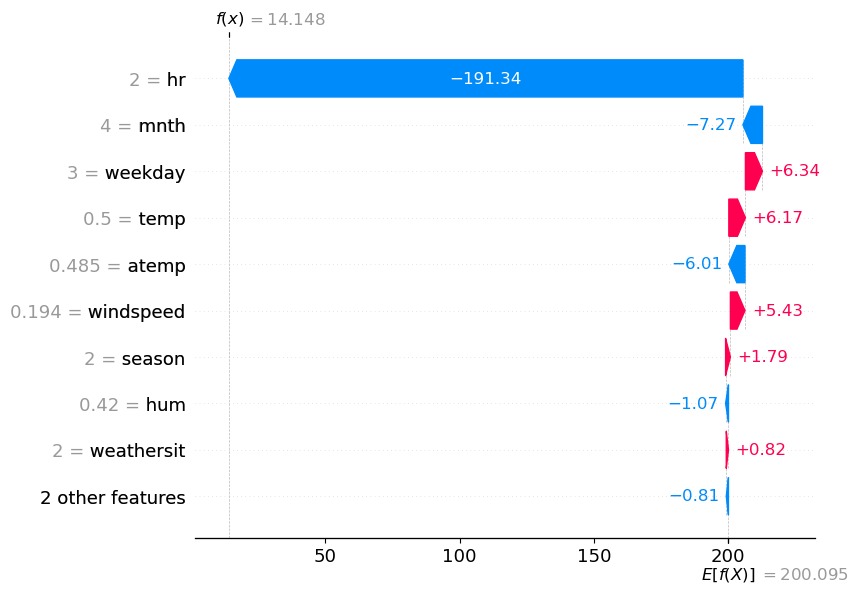

In [38]:
shap.waterfall_plot(lgbm_explainer_values[0])

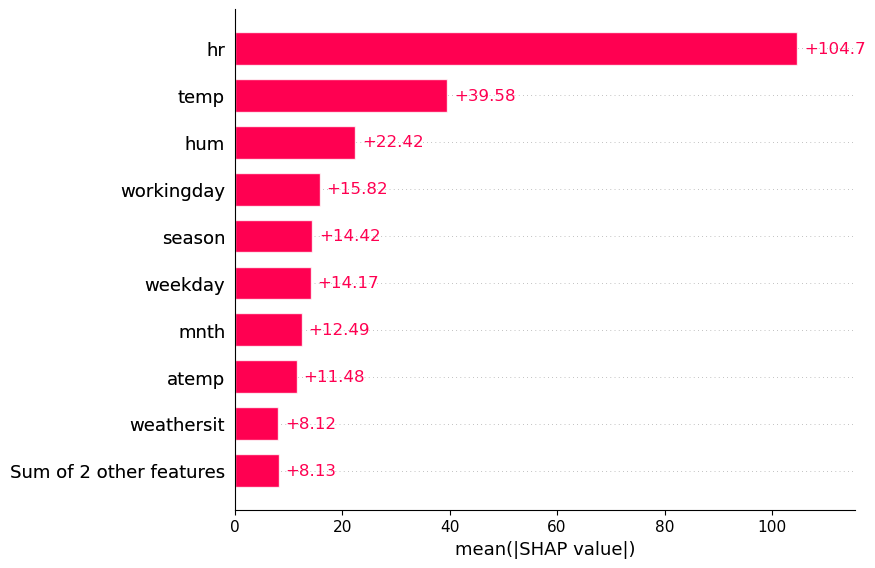

In [39]:
shap.plots.bar(lgbm_explainer_values)

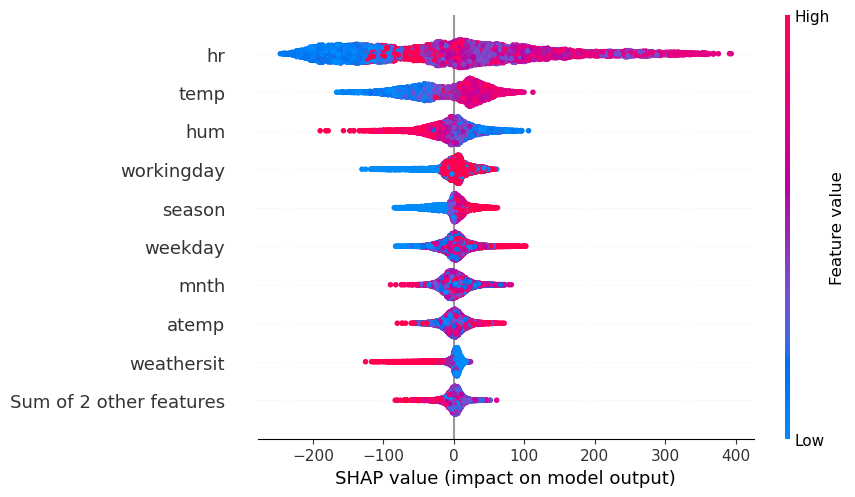

In [40]:
shap.plots.beeswarm(lgbm_explainer_values)

### ENSEMBLE MODELS WITH VOTING CLASSIFIER

Ensemble models combine the decisions from multiple models to improve the overall performance. This can be achieved in various ways. 

#### VOTING CLASSIFIER

Voting is one of the ensemble machine learning algorithm.A voting ensemble involves summing the predictions made by classification models or averaging the predictions made by regression models.

For regression, a voting ensemble involves making a prediction that is the average of multiple other regression models.

In classification, a hard voting ensemble involves summing the votes for crisp class labels from other models and predicting the class with the most votes. A soft voting ensemble involves summing the predicted probabilities for class labels and predicting the class label with the largest sum probability.

In [290]:
from sklearn.ensemble import VotingRegressor
reg1 = GradientBoostingRegressor(subsample= 0.5,learning_rate= 0.01,n_estimators= 1500, max_depth= 10,random_state= 2023)
reg2 = MLPRegressor(random_state=42, max_iter=300,hidden_layer_sizes=(200,200,200),learning_rate='adaptive')
reg3 = LGBMRegressor(n_estimators= 900, learning_rate= 0.3906068839768132, num_leaves=166, max_depth= 14,
                    min_data_in_leaf= 200, min_gain_to_split= 4.429, bagging_fraction=0.69905737, max_bin=217, lambda_l1= 40, lambda_l2= 80, bagging_freq=1,
                    feature_fraction= 0.8472515809996217)



reg1.fit(X_train, y_train)
reg2.fit(X_train, y_train)
reg3.fit(X_train, y_train)

ereg = VotingRegressor([("gb", reg1), ("rf", reg2), ("XG", reg3)])
ereg.fit(X_train, y_train)

y_pred = ereg.predict(X_test) 
print("Score:",ereg.score(X_test,y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test,y_pred))


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] lambda_l2 is set=80, reg_lambda=0.0 will be ignored. Current value: lambda_l2=80
[LightGBM] [Warning] feature_fraction is set=0.8472515809996217, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8472515809996217
[LightGBM] [Warning] bagging_fraction is set=0.69905737, subsample=1.0 will be ignored. Current value: bagging_fraction=0.69905737
[LightGBM] [Warning] min_gain_to_split is set=4.429, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.429
[LightGBM] [Warning] lambda_l1 is set=40, reg_alpha=0.0 will be ignored. Current value: lambda_l1=40
Score: 0.967957678172371
RMSE: 40.78235095737434
R2 Score: 0.967957678172371


#### STACKING 

Stacking is an ensemble learning technique that uses predictions from multiple models (for example decision tree, knn or svm) to build a new model. This model is used for making predictions on the test set.

The final_estimator will use the predictions of the estimators as input. It needs to be a classifier or a regressor when using StackingClassifier or StackingRegressor.

In [291]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

estimators = [('MLP', MLPRegressor(random_state=42, max_iter=300,hidden_layer_sizes=(200,200,200),learning_rate='adaptive')),
              ('GRADIENT', GradientBoostingRegressor(subsample= 0.5,learning_rate= 0.01,n_estimators= 1500, max_depth= 10,random_state= 2023)),
              ('LGBM', LGBMRegressor(n_estimators= 900, learning_rate= 0.3906068839768132, num_leaves=166, max_depth= 14,
                    min_data_in_leaf= 200, min_gain_to_split= 4.429, bagging_fraction=0.69905737, max_bin=217, lambda_l1= 40, lambda_l2= 80, bagging_freq=1,
                    feature_fraction= 0.8472515809996217))]
    
final_estimator = LinearRegression()
stack = StackingRegressor(estimators=estimators,final_estimator=final_estimator,cv=5)
stack.fit(X_train, y_train)

[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] lambda_l2 is set=80, reg_lambda=0.0 will be ignored. Current value: lambda_l2=80
[LightGBM] [Warning] feature_fraction is set=0.8472515809996217, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8472515809996217
[LightGBM] [Warning] bagging_fraction is set=0.69905737, subsample=1.0 will be ignored. Current value: bagging_fraction=0.69905737
[LightGBM] [Warning] min_gain_to_split is set=4.429, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.429
[LightGBM] [Warning] lambda_l1 is set=40, reg_alpha=0.0 will be ignored. Current value: lambda_l1=40
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set

StackingRegressor(cv=5,
                  estimators=[('MLP',
                               MLPRegressor(hidden_layer_sizes=(200, 200, 200),
                                            learning_rate='adaptive',
                                            max_iter=300, random_state=42)),
                              ('GRADIENT',
                               GradientBoostingRegressor(learning_rate=0.01,
                                                         max_depth=10,
                                                         n_estimators=1500,
                                                         random_state=2023,
                                                         subsample=0.5)),
                              ('LGBM',
                               LGBMRegressor(bagging_fraction=0.69905737,
                                             bagging_freq=1,
                                             feature_fraction=0.8472515809996217,
                                      

# !!!! BEST SCORE OF THE PROJECT COMES FROM STACKING ENSMEBLE !!!!

In [292]:
y_pred = stack.predict(X_test) 
print("Score:",stack.score(X_test,y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test,y_pred))

Score: 0.9759377280926103
RMSE: 35.340979628462875
R2 Score: 0.9759377280926103


In [298]:
# SAVE MODEL

import joblib
from joblib import dump, load
# Save a model to file
dump(stack, filename="stack.joblib")

['stack.joblib']

#### BAGGING REGRESSOR

A Bagging regressor is an ensemble meta-estimator that fits base regressors each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it.

In [296]:
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
estimator=LGBMRegressor(n_estimators= 900, learning_rate= 0.3906068839768132, num_leaves=166, max_depth= 14,
                    min_data_in_leaf= 200, min_gain_to_split= 4.429, bagging_fraction=0.69905737, max_bin=217, lambda_l1= 40, lambda_l2= 80, bagging_freq=1,
                    feature_fraction= 0.8472515809996217)

bagging= BaggingRegressor(base_estimator=estimator,n_estimators=10, random_state=0).fit(X_train, y_train)

[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_gain_to_split is set=4.429, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.429
[LightGBM] [Warning] feature_fraction is set=0.8472515809996217, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8472515809996217
[LightGBM] [Warning] bagging_fraction is set=0.69905737, subsample=1.0 will be ignored. Current value: bagging_fraction=0.69905737
[LightGBM] [Warning] lambda_l2 is set=80, reg_lambda=0.0 will be ignored. Current value: lambda_l2=80
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] lambda_l1 is set=40, reg_alpha=0.0 will be ignored. Current value: lambda_l1=40


In [297]:
y_pred = bagging.predict(X_test) 
print("Score:",bagging.score(X_test,y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test,y_pred))

Score: 0.9601768108066415
RMSE: 45.465114292461884
R2 Score: 0.9601768108066415
